Second Try with a different dataset (RANDOM FOREST)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/tabea/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading in the dataframes
df_BMW_raw = pd.read_csv("BMW_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3], dtype={"mileage":"string", "price":"string", "Bike":"string", "Types and Used Time": "string"})
df_ducatti_raw = pd.read_csv("ducatti_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3])
df_KTM_raw = pd.read_csv("KTM_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3])
df_Royal_Enfield_raw = pd.read_csv("Royal_Enfield_Standard_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3])
df_Suzuki_raw = pd.read_csv("Suzuki_bike.csv", delimiter = ",",usecols=[0, 1, 2, 3])
df_Yamaha_raw = pd.read_csv("Yamaha_bike.csv", delimiter = ",",usecols=[0, 1, 2, 3])
df_bikez =  pd.read_csv("all_bikez_curated.csv", delimiter = ",", dtype={"Brand":"string", "Model":"string", "Year":int, "Category":"string", "Rating":float, "Displacement (ccm)":float, "Power (hp)":float, "Torque(Nm)":float, "Engine cylinder":"string", "Engine stroke":"string",'Gearbox':"string", 'Bore (mm)':float, 'Stroke (mm)':"string", 'Fuel capacity (lts)':float,
       'Fuel system':"string", 'Fuel control':"string", 'Cooling system':"string", 'Transmission type':"string",
       'Dry weight (kg)':float, 'Wheelbase (mm)':float, 'Seat height (mm)':float, 'Front brakes':"string",
       'Rear brakes':"string", 'Front tire':"string", 'Rear tire':"string", 'Front suspension':"string",
       'Rear suspension':"string", 'Color options':"string"})

df_BMW_raw = df_BMW_raw.dropna(subset=["mileage"])
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.lower()

df_ducatti_raw = df_ducatti_raw.dropna(subset=["mileage"])
df_ducatti_raw = df_ducatti_raw.rename(columns={"Bike name": "Bike", "Time of USed": "Types and Used Time"})
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.lower()

df_KTM_raw = df_KTM_raw.dropna(subset=["mileage"])
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.lower()

df_Royal_Enfield_raw = df_Royal_Enfield_raw.dropna(subset=["mileage"])
df_Royal_Enfield_raw = df_Royal_Enfield_raw.rename(columns={"bike": "Bike", "Types": "Types and Used Time"})
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.lower()

df_Suzuki_raw = df_Suzuki_raw.dropna(subset=["mileage"])
df_Suzuki_raw = df_Suzuki_raw.rename(columns={"BIke name": "Bike"})
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.lower()

df_Yamaha_raw = df_Yamaha_raw.dropna(subset=["mileage"])
df_Yamaha_raw = df_Yamaha_raw.rename(columns={"Bike name": "Bike", "Types and Used  Time": "Types and Used Time"})
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.lower()

df_bikez = df_bikez.rename(columns={"Model": "Bike"})
df_bikez["Bike"] = df_bikez["Bike"].str.lower()

In [3]:
df_bikez_bmw = df_bikez[df_bikez["Brand"] == "bmw"]
df_bikez_royal_enfield = df_bikez[df_bikez["Brand"] == "enfield"]
df_bikez_ducatti = df_bikez[df_bikez["Brand"] == "ducati"]
df_bikez_ktm = df_bikez[df_bikez["Brand"] == "ktm"]
df_bikez_suzuki = df_bikez[df_bikez["Brand"] == "suzuki"]
df_bikez_yamaha = df_bikez[df_bikez["Brand"] == "yamaha"]

In [4]:
df_BMW_raw["Year"] = df_BMW_raw["Types and Used Time"].str.split('BMW').str[0]
df_BMW_raw["Year"] = df_BMW_raw["Year"].replace("New", "", regex=True).astype(int)

df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace(" ", "", regex=True)
df_bikez_bmw["Bike"] = df_bikez_bmw["Bike"].replace(" ", "", regex=True)

df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.split('first').str[0]
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("[/]", "", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r1100sboxercup", "r1100sboxercupreplica", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r1250", "r1250gs", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r1100rtabs", "r1100rt", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r807", "r80", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1250gs.*$)', 'r1250gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*s1000xr.*$)', 's1000xr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*g310.*$)', 'g310r', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*k1600b.*$)', 'k1600b', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1250.*$)', 'r1250gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r18.*$)', 'r18', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*s1000r.*$)', 's1000r', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f900r.*$)', 'f900r', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f900xr.*$)', 'f900xr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200rt.*$)', 'r1200rt', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*ce04.*$)', 'ce04', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200gsadventure.*$)', 'r1200gsadventure', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f850gsadventure.*$)', 'f850gsadventure', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f800gt.*$)', 'f800gt', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f800gs.*$)', 'f800gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*s1000.*$)', 's1000rr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1250rt.*$)', 'r1250rt', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*m1000r.*$)', 'm1000rr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f750.*$)', 'f750gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f850gs.*$)', 'f850gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*k1600.*$)', 'k1600b', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1000.*$)', 'm1000rr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200.*$)', 'r1200avantgarde', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200gs.*$)', 'r1200gs', regex=True)

/tmp/ipykernel_59984/2619773030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_bmw["Bike"] = df_bikez_bmw["Bike"].replace(" ", "", regex=True)


In [5]:
df_BMW = pd.merge(df_BMW_raw, df_bikez_bmw, how = "left",  on = ["Bike", "Year"])
df_BMW = df_BMW.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")
df_merged_temp = pd.merge(df_BMW_raw, df_bikez_bmw, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_BMW.reset_index(inplace=True, drop=True)


df_BMW["Category"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_BMW["Displacement (ccm)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_BMW["Power (hp)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_BMW["Torque (Nm)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_BMW["Engine stroke"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_BMW["Dry weight (kg)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True)
df_BMW["Brand"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_BMW = df_BMW.dropna(subset=["Category"])

df_BMW = df_BMW.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

df_BMW = df_BMW.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

#df_BMW["Dry weight (kg)"].fillna(value=df_BMW.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_BMW["Dry weight (kg)"].fillna(value=df_BMW['Dry weight (kg)'].mean(), inplace=True)

df_BMW["Displacement (ccm)"].fillna(value=df_BMW.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_BMW["Displacement (ccm)"].fillna(value=df_BMW["Displacement (ccm)"].mean(), inplace=True) 

df_BMW["Power (hp)"].fillna(value=df_BMW.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_BMW["Power (hp)"].fillna(value=df_BMW["Power (hp)"].mean(), inplace=True) 

df_BMW["Torque (Nm)"].fillna(value=df_BMW.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_BMW["Torque (Nm)"].fillna(value=df_BMW["Torque (Nm)"].mean(), inplace=True) 

df_BMW["mileage"] = df_BMW["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_BMW = df_BMW.loc[df_BMW["price"]!= "No Price Listed"]
df_BMW["price"] = df_BMW["price"].replace("[$,]", "", regex=True).astype(int)


$\textbf{BMW CLEANING DONE}$

In [6]:
df_Royal_Enfield_raw["Year"] = df_Royal_Enfield_raw["Types and Used Time"].str.split('Royal').str[0]
df_Royal_Enfield_raw["Year"] = df_Royal_Enfield_raw["Year"].replace("New", "", regex=True)
df_Royal_Enfield_raw["Year"] = df_Royal_Enfield_raw["Year"].replace("Used", "", regex=True).astype(int)

df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].replace(" ", "", regex=True)
df_bikez_royal_enfield["Bike"] = df_bikez_royal_enfield["Bike"].replace(" ", "", regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*himalayan.*$)', 'himalayan', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*continentalgt.*$)', 'continentalgt', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*classic350.*$)', 'classic350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*int650.*$)', 'interceptor650', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*meteor350.*$)', 'meteor350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*classic500.*$)', 'classic500', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*metro350.*$)', 'meteor350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*contienetalgt650.*$)', 'continentalgt650', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*meteor.*$)', 'meteor350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*interceptor650.*$)', 'interceptor650', regex=True)

/tmp/ipykernel_59984/746029178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_royal_enfield["Bike"] = df_bikez_royal_enfield["Bike"].replace(" ", "", regex=True)


In [7]:
df_Royal_Enfield = pd.merge(df_Royal_Enfield_raw, df_bikez_royal_enfield, how = "left",  on = ["Bike", "Year"])
df_Royal_Enfield = df_Royal_Enfield.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_Royal_Enfield_raw, df_bikez_royal_enfield, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_Royal_Enfield.reset_index(inplace=True, drop=True)

df_Royal_Enfield["Category"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_Royal_Enfield["Displacement (ccm)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_Royal_Enfield["Power (hp)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_Royal_Enfield["Torque (Nm)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_Royal_Enfield["Engine stroke"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_Royal_Enfield["Dry weight (kg)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_Royal_Enfield["Brand"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_Royal_Enfield = df_Royal_Enfield.dropna(subset=["Category"])

df_Royal_Enfield = df_Royal_Enfield.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_Royal_Enfield["Dry weight (kg)"].fillna(value=df_BMW.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_Royal_Enfield["Dry weight (kg)"].fillna(value=df_BMW['Dry weight (kg)'].mean(), inplace=True)

df_Royal_Enfield["Displacement (ccm)"].fillna(value=df_Royal_Enfield.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_Royal_Enfield["Displacement (ccm)"].fillna(value=df_Royal_Enfield["Displacement (ccm)"].mean(), inplace=True) 

df_Royal_Enfield["Power (hp)"].fillna(value=df_Royal_Enfield.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_Royal_Enfield["Power (hp)"].fillna(value=df_Royal_Enfield["Power (hp)"].mean(), inplace=True) 

df_Royal_Enfield["Torque (Nm)"].fillna(value=df_Royal_Enfield.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_Royal_Enfield["Torque (Nm)"].fillna(value=df_Royal_Enfield["Torque (Nm)"].mean(), inplace=True) 

df_Royal_Enfield["mileage"] = df_Royal_Enfield["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_Royal_Enfield = df_Royal_Enfield.loc[df_Royal_Enfield["price"]!= "No Price Listed"]
df_Royal_Enfield["price"] = df_Royal_Enfield["price"].replace("[$,]", "", regex=True).astype(int)
df_Royal_Enfield

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,1,5299,himalayan,New 2022 Royal Enfield Standard,2022,enfield,Enduro / offroad,411.0,24.500000,32.0,Single cylinder,four-stroke
1,1256,4500,bullet500b5,Used 2009 Royal Enfield Classic / Vintage,2009,enfield,Classic,499.0,30.218505,40.9,<NA>,four-stroke
2,5,6349,continentalgt,New 2023 Royal Enfield Cruiser,2023,enfield,Allround,535.0,29.100000,41.3,<NA>,four-stroke
3,3,6349,continentalgt,New 2023 Royal Enfield Cruiser,2023,enfield,Allround,535.0,29.100000,41.3,<NA>,four-stroke
4,1,4499,classic350,New 2022 Royal Enfield Standard,2022,enfield,Classic,349.3,19.700000,27.0,Single cylinder,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
338,5717,4700,meteor350,Used 2021 Royal Enfield Cruiser,2021,enfield,Classic,349.0,19.900000,27.0,<NA>,four-stroke
339,1056,3980,meteor350,Used 2021 Royal Enfield Cruiser,2021,enfield,Classic,349.0,19.900000,27.0,<NA>,four-stroke
340,1162,4495,interceptor650,Used 2019 Royal Enfield Standard,2019,enfield,Allround,648.0,47.000000,52.0,Twin,four-stroke
341,6,5449,himalayan,New 2023 Royal Enfield Standard,2023,enfield,Enduro / offroad,411.0,24.500000,32.0,<NA>,four-stroke


$\textbf{ROYAL ENFIELD CLEANING DONE}$

In [8]:
df_ducatti_raw["Year"] = df_ducatti_raw["Types and Used Time"].str.split('Ducati').str[0]
df_ducatti_raw["Year"] = df_ducatti_raw["Year"].replace("New", "", regex=True)
df_ducatti_raw["Year"] = df_ducatti_raw["Year"].replace("Used", "", regex=True).astype(int)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].replace(" ", "", regex=True)
df_bikez_ducatti["Bike"] = df_bikez_ducatti["Bike"].replace(" ", "", regex=True)

df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*superleggera1299.*$)', 'superleggera1299', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*1199panigale.*$)', '1199panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*937.*$)', 'monster797plus', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigalev4sp.*$)', 'panigalev4sp', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*monster821.*$)', 'monster821', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*959panigale.*$)', '959panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].replace("superbikepanigalev4", "panigalev4", regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistradav4.*$)', 'multistradav4', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*diavel.*$)', 'diavel1260', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistrada1260.*$)', 'multistrada1260', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*base.*$)', 'monsterplus', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigale899.*$)', 'panigale959', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigalev2.*$)', 'panigalev2', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*superleggera.*$)', 'superleggerav4', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*monster1200.*$)', 'monster1200', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*scrambler800.*$)', 'scramblercaferacer', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*streetfighterv4s.*$)', 'streetfighterv4s', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*1299panigale.*$)', '1299panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*supersport9.*$)', 'supersport950', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*monster+.*$)', 'monsterplus', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigale1199.*$)', '1199panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigale1299.*$)', '1199panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistrada1200.*$)', 'multistrada1200enduro', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistrada950.*$)', 'multistrada950', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*899panigale.*$)', '899panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*streetfighterv4d.*$)', 'streetfighterv4', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigalev4s.*$)', 'panigalev4s', regex=True)


/tmp/ipykernel_59984/1497480933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_ducatti["Bike"] = df_bikez_ducatti["Bike"].replace(" ", "", regex=True)


In [9]:
df_ducati = pd.merge(df_ducatti_raw, df_bikez_ducatti, how = "left",  on = ["Bike", "Year"])
df_ducati = df_ducati.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_ducatti_raw, df_bikez_ducatti, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_ducati.reset_index(inplace=True, drop=True)

df_ducati["Category"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_ducati["Displacement (ccm)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_ducati["Power (hp)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_ducati["Torque (Nm)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_ducati["Engine stroke"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_ducati["Dry weight (kg)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_ducati["Brand"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_ducati = df_ducati.dropna(subset=["Category"])

df_ducati = df_ducati.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_ducati["Dry weight (kg)"].fillna(value=df_ducati.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_ducati["Dry weight (kg)"].fillna(value=df_ducati['Dry weight (kg)'].mean(), inplace=True)

df_ducati["Displacement (ccm)"].fillna(value=df_ducati.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_ducati["Displacement (ccm)"].fillna(value=df_ducati["Displacement (ccm)"].mean(), inplace=True) 

df_ducati["Power (hp)"].fillna(value=df_ducati.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_ducati["Power (hp)"].fillna(value=df_ducati["Power (hp)"].mean(), inplace=True) 

df_ducati["Torque (Nm)"].fillna(value=df_ducati.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_ducati["Torque (Nm)"].fillna(value=df_ducati["Torque (Nm)"].mean(), inplace=True) 

df_ducati["mileage"] = df_ducati["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_ducati = df_ducati.loc[df_ducati["price"]!= "No Price Listed"]
df_ducati["price"] = df_ducati["price"].replace("[$,]", "", regex=True).astype(int)
df_ducati

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,1050,49995,superleggerav4,2014 Ducati Sportbike,2014,ducati,Naked bike,998.0,221.0,116.0,<NA>,four-stroke
1,6308,11795,monsterplus,2021 Ducati Dirt Bike,2021,ducati,Naked bike,937.0,111.0,93.0,V2,four-stroke
2,2400,9495,scrambler1100,2018 Ducati Sportbike,2018,ducati,Classic,1079.0,84.5,88.0,V2,four-stroke
3,11200,5500,st2,1999 Ducati Sport Touring,1999,ducati,Sport touring,944.0,83.0,83.0,V2,four-stroke
4,1300,34900,streetfighterv4s,2022 Ducati Sportbike,2022,ducati,Naked bike,1103.0,208.0,123.0,<NA>,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
578,2049,10499,scramblercaferacer,2018 Ducati Standard,2018,ducati,Classic,803.0,73.0,68.0,V2,four-stroke
579,20632,14495,multistrada1200enduro,2016 Ducati Sport Touring,2016,ducati,Enduro / offroad,1198.4,160.0,136.0,V2,four-stroke
580,10850,11999,diavel1260,2015 Ducati Sportbike,2015,ducati,Allround,1262.0,155.0,129.0,<NA>,four-stroke
581,12000,10750,hypermotardsp,2015 Ducati Super Moto,2015,ducati,Super motard,821.1,110.0,89.0,V2,four-stroke


$\textbf{DUCATTI CLEANING DONE}$

In [10]:
df_KTM_raw["Year"] = df_KTM_raw["Types and Used Time"].str.split('KTM').str[0]
df_KTM_raw["Year"] = df_KTM_raw["Year"].replace("New", "", regex=True)
df_KTM_raw["Year"] = df_KTM_raw["Year"].replace("Used", "", regex=True).astype(int)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].replace(" ", "", regex=True)
df_bikez_ktm["Bike"] = df_bikez_ktm["Bike"].replace(" ", "", regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*smc690r.*$)', '690smcr', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*690smcr.*$)', '690smcr', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*superduke1290r.*$)', '1290superduker', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*1290superduke.*$)', '1290superduker', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*superduke990.*$)', '990superduke', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*duke390abs.*$)', '390duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure1190.*$)', '1090adventure', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure1290.*$)', '1290superadventurer', regex=True)
#df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure1290.*$)', '1290adventure', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure890.*$)', '890adventure', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*890adventure.*$)', '890adventure', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*790adventure.*$)', '790adventure', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*890duke.*$)', '890duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*rc390.*$)', 'rc390', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*690duke.*$)', '690duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*duke690.*$)', '690duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*500exc-f.*$)', '500exc-f', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*450xc.*$)', '450exc-f', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*350xc.*$)', '350exc-f', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*smc690r.*$)', '690smcr', regex=True)

/tmp/ipykernel_59984/1294204431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_ktm["Bike"] = df_bikez_ktm["Bike"].replace(" ", "", regex=True)


In [11]:
df_ktm = pd.merge(df_KTM_raw, df_bikez_ktm, how = "left",  on = ["Bike", "Year"])
df_ktm = df_ktm.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_KTM_raw, df_bikez_ktm, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_ktm.reset_index(inplace=True, drop=True)

df_ktm["Category"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_ktm["Displacement (ccm)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_ktm["Power (hp)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_ktm["Torque (Nm)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_ktm["Engine stroke"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_ktm["Dry weight (kg)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_ktm["Brand"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_ktm = df_ktm.dropna(subset=["Category"])

df_ktm = df_ktm.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_ktm["Dry weight (kg)"].fillna(value=df_ktm.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_ktm["Dry weight (kg)"].fillna(value=df_ktm['Dry weight (kg)'].mean(), inplace=True)

df_ktm["Displacement (ccm)"].fillna(value=df_ktm.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_ktm["Displacement (ccm)"].fillna(value=df_ktm["Displacement (ccm)"].mean(), inplace=True) 

df_ktm["Power (hp)"].fillna(value=df_ktm.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_ktm["Power (hp)"].fillna(value=df_ktm["Power (hp)"].mean(), inplace=True) 

df_ktm["Torque (Nm)"].fillna(value=df_ktm.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_ktm["Torque (Nm)"].fillna(value=df_ktm["Torque (Nm)"].mean(), inplace=True) 

df_ktm["mileage"] = df_ktm["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_ktm = df_ktm.loc[df_ktm["price"]!= "No Price Listed"]
df_ktm["price"] = df_ktm["price"].replace("[$,]", "", regex=True).astype(int)
df_ktm

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,10336,14994,1290superduker,2019 KTM Sport Touring,2019,ktm,Naked bike,1301.0,177.000000,87.525114,V2,four-stroke
1,5796,10999,690smcr,2019 KTM Super Moto,2019,ktm,Super motard,690.0,67.000000,64.000000,Single cylinder,four-stroke
2,485,9500,350exc-f,2018 KTM Dual Sport,2018,ktm,Enduro / offroad,349.7,109.491579,87.525114,Single cylinder,four-stroke
3,57,7995,350exc-f,2020 KTM Dual Sport,2020,ktm,Enduro / offroad,349.7,109.491579,87.525114,Single cylinder,four-stroke
5,35,9586,790duke,2019 KTM Standard,2019,ktm,Naked bike,799.0,105.000000,87.525114,Twin,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
583,26756,9999,1190adventurer,2014 KTM Dual Sport,2014,ktm,Allround,1195.0,147.000000,87.525114,Twin,four-stroke
584,11815,5999,690absduke,2014 KTM Sportbike,2014,ktm,Naked bike,690.0,67.100000,87.525114,Single cylinder,four-stroke
585,13568,10999,1190adventure,2014 KTM Dual Sport,2014,ktm,Allround,1195.0,147.000000,87.525114,Twin,four-stroke
586,10995,4499,690duke,2014 KTM Sportbike,2014,ktm,Naked bike,654.0,64.400000,67.000000,<NA>,four-stroke


$\textbf{KTM CLEANING DONE}$

In [12]:
df_Suzuki_raw["Year"] = df_Suzuki_raw["Types and Used Time"].str.split('Suzuki').str[0]
df_Suzuki_raw["Year"] = df_Suzuki_raw["Year"].replace("New", "", regex=True)
df_Suzuki_raw["Year"] = df_Suzuki_raw["Year"].replace("Used", "", regex=True).astype(int)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].replace(" ", "", regex=True)
df_bikez_suzuki["Bike"] = df_bikez_suzuki["Bike"].replace(" ", "", regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*hayabusa.*$)', 'hayabusa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-r1300.*$)', 'hayabusa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-1300r.*$)', 'hayabusa', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx1300.*$)', 'hayabusa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-1000.*$)', 'gsx-r1000', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*m109rb.*$)', 'boulevardm109rboss', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*boulevard.*$)', 'boulevardc50t', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr1000.*$)', 'gsx-r1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-r1000.*$)', 'gsx-r1000', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-r750.*$)', 'gsx-r750', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr750.*$)', 'gsx-r750', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr600.*$)', 'gsx-r600', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*vstrom650.*$)', 'v-strom650', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*vstrom1000.*$)', 'v-strom1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*v-strom1000.*$)', 'v-strom1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*v-strom1000.*$)', 'v-strom1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*bandit1200.*$)', 'bandit1250sa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-s1000gt.*$)', 'gsx-s1000gt', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx1000.*$)', 'gsx-r1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-s750z.*$)', 'gsx-s750z', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxs1000.*$)', 'gsx-s1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxs1000.*$)', 'gsx-s1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr-600.*$)', 'gsx-r600', regex=True)



/tmp/ipykernel_59984/2620846397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_suzuki["Bike"] = df_bikez_suzuki["Bike"].replace(" ", "", regex=True)


In [13]:
df_suzuki = pd.merge(df_Suzuki_raw, df_bikez_suzuki, how = "left",  on = ["Bike", "Year"])
df_suzuki = df_suzuki.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_Suzuki_raw, df_bikez_suzuki, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_suzuki.reset_index(inplace=True, drop=True)

df_suzuki["Category"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_suzuki["Displacement (ccm)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_suzuki["Power (hp)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_suzuki["Torque (Nm)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_suzuki["Engine stroke"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_suzuki["Dry weight (kg)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_suzuki["Brand"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_suzuki = df_suzuki.dropna(subset=["Category"])

df_suzuki = df_suzuki.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_suzuki["Dry weight (kg)"].fillna(value=df_ktm.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_suzuki["Dry weight (kg)"].fillna(value=df_ktm['Dry weight (kg)'].mean(), inplace=True)

df_suzuki["Displacement (ccm)"].fillna(value=df_suzuki.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_suzuki["Displacement (ccm)"].fillna(value=df_suzuki["Displacement (ccm)"].mean(), inplace=True) 

df_suzuki["Power (hp)"].fillna(value=df_suzuki.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_suzuki["Power (hp)"].fillna(value=df_suzuki["Power (hp)"].mean(), inplace=True) 

df_suzuki["Torque (Nm)"].fillna(value=df_suzuki.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_suzuki["Torque (Nm)"].fillna(value=df_suzuki["Torque (Nm)"].mean(), inplace=True) 

df_suzuki["mileage"] = df_suzuki["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_suzuki = df_suzuki.loc[df_suzuki["price"]!= "No Price Listed"]
df_suzuki["price"] = df_suzuki["price"].replace("[$,]", "", regex=True).astype(int)
df_suzuki

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,8038,14995,gsx-r1000,2020 Suzuki Sportbike,2020,suzuki,Sport,999.8,198.000000,117.000000,In-line four,four-stroke
1,10217,10498,boulevardc50t,2019 Suzuki Cruiser,2019,suzuki,Touring,805.0,53.000000,69.000000,V2,four-stroke
2,18,18500,hayabusa,2022 Suzuki Sportbike,2022,suzuki,Sport,1340.0,197.000000,155.000000,In-line four,four-stroke
3,10600,6450,v-strom650absadventure,2013 Suzuki Dual Sport,2013,suzuki,Super motard,645.0,67.000000,60.000000,V2,four-stroke
4,5540,6999,dr-z400sm,2021 Suzuki Competition,2021,suzuki,Super motard,398.0,110.543925,89.722047,Single cylinder,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
748,3,10799,v-strom650,New 2023 Suzuki Dual Sport,2023,suzuki,Allround,645.0,110.543925,89.722047,<NA>,four-stroke
749,5,15599,boulevardc50t,New 2023 Suzuki Cruiser,2023,suzuki,Custom / cruiser,819.4,110.543925,89.722047,<NA>,four-stroke
750,2,9104,v-strom650,New 2023 Suzuki Dual Sport,2023,suzuki,Allround,645.0,110.543925,89.722047,<NA>,four-stroke
751,2,18799,hayabusa,New 2023 Suzuki Sportbike,2023,suzuki,Sport,1340.0,110.543925,89.722047,<NA>,four-stroke


$\textbf{SUZUKI CLEANING DONE}$

In [14]:
df_Yamaha_raw["Year"] = df_Yamaha_raw["Types and Used Time"].str.split('Yamaha').str[0]
df_Yamaha_raw["Year"] = df_Yamaha_raw["Year"].replace("New", "", regex=True)
df_Yamaha_raw["Year"] = df_Yamaha_raw["Year"].replace("Used", "", regex=True).astype(int)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].replace(" ", "", regex=True)
df_bikez_yamaha["Bike"] = df_bikez_yamaha["Bike"].replace(" ", "", regex=True)

df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr1m.*$)', 'yzf-r1m', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt-03.*$)', 'mt-03', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr6.*$)', 'yzf-r6', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs1100.*$)', 'xvs950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs650.*$)', 'xvs650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs950.*$)', 'xvs950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xv1900.*$)', 'xv1900a', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xv1700.*$)', 'xv1900a', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz07.*$)', 'fz-07', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*raider1900.*$)', 'raider', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yz450f.*$)', 'yz450f', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstar950.*$)', 'vstar950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz-07.*$)', 'fz-07', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt03.*$)', 'mt-03', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xv650.*$)', 'xvs650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs1300.*$)', 'xvs950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzf-r7.*$)', 'yzf-r7', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr3.*$)', 'yzf-r3', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt09.*$)', 'mt-09', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*r1yzf.*$)', 'yzf-r1m', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*raider.*$)', 'raider', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*v-star1100.*$)', 'vstar950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt09.*$)', 'mt-09', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt10.*$)', 'mt-10', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr7.*$)', 'yzf-r7', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzf-r3.*$)', 'yzf-r3', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr7.*$)', 'yzf-r7', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr150.*$)', 'yzf-r15', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstar650.*$)', 'vstar650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstarcustom650.*$)', 'vstar650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt-10ca.*$)', 'mt-10', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt-07ca.*$)', 'mt-07', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstar®1100.*$)', 'vstar950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr1s.*$)', 'yzf-r1s', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz10.*$)', 'fz-10', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz09.*$)', 'fz-09', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt07.*$)', 'mt-07', regex=True)



/tmp/ipykernel_59984/4220114532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_yamaha["Bike"] = df_bikez_yamaha["Bike"].replace(" ", "", regex=True)


In [15]:
df_yamaha = pd.merge(df_Yamaha_raw, df_bikez_yamaha, how = "left",  on = ["Bike", "Year"])
df_yamaha = df_yamaha.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_Yamaha_raw, df_bikez_yamaha, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_yamaha.reset_index(inplace=True, drop=True)

df_yamaha["Category"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_yamaha["Displacement (ccm)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_yamaha["Power (hp)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_yamaha["Torque (Nm)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_yamaha["Engine stroke"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_yamaha["Dry weight (kg)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_yamaha["Brand"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_yamaha = df_yamaha.dropna(subset=["Category"])

df_yamaha = df_yamaha.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_yamaha["Dry weight (kg)"].fillna(value=df_yamaha.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_yamaha["Dry weight (kg)"].fillna(value=df_yamaha['Dry weight (kg)'].mean(), inplace=True)

df_yamaha["Displacement (ccm)"].fillna(value=df_yamaha.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_yamaha["Displacement (ccm)"].fillna(value=df_yamaha["Displacement (ccm)"].mean(), inplace=True) 

df_yamaha["Power (hp)"].fillna(value=df_yamaha.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_yamaha["Power (hp)"].fillna(value=df_yamaha["Power (hp)"].mean(), inplace=True) 

df_yamaha["Torque (Nm)"].fillna(value=df_yamaha.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_yamaha["Torque (Nm)"].fillna(value=df_yamaha["Torque (Nm)"].mean(), inplace=True) 

df_yamaha["mileage"] = df_yamaha["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_yamaha = df_yamaha.loc[df_yamaha["price"]!= "No Price Listed"]
df_yamaha["price"] = df_yamaha["price"].replace("[$,]", "", regex=True).astype(int)
df_yamaha

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,1261,16688,stareluder,2018 Yamaha Touring,2018,yamaha,Touring,1851.9,89.900000,171.000000,V2,four-stroke
1,11256,17999,starventure,2018 Yamaha Touring,2018,yamaha,Touring,1854.0,103.949842,81.543772,V2,four-stroke
3,9400,6500,fz-09,2015 Yamaha Sportbike,2015,yamaha,Naked bike,847.0,115.000000,61.500000,In-line three,four-stroke
4,6689,13499,supertenerees,2021 Yamaha Dual Sport,2021,yamaha,Super motard,1199.0,112.000000,117.000000,Twin,four-stroke
5,8415,6150,fz-07,2017 Yamaha Sportbike,2017,yamaha,Naked bike,689.0,103.949842,81.543772,Twin,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,8599,yz250f,New 2023 Yamaha Competition,2023,yamaha,Cross / motocross,249.0,103.949842,81.543772,<NA>,four-stroke
644,344,11500,yzf-r7,2023 Yamaha Sportbike,2023,yamaha,Sport,749.0,140.000000,81.543772,<NA>,four-stroke
645,1,1699,pw50,New 2023 Yamaha Dirt Bike,2023,yamaha,"Minibike, cross",49.0,2.700000,3.800000,<NA>,two-stroke
646,2,2299,tt-r110e,New 2023 Yamaha Dirt Bike,2023,yamaha,Enduro / offroad,110.0,103.949842,81.543772,<NA>,four-stroke


$\textbf{SUZUKI CLEANING DONE}$

$\textbf{MERGING DATAFRAMES:}$

In [16]:
df_all_brands = pd.concat([df_BMW, df_Royal_Enfield, df_ktm, df_ducati, df_suzuki, df_yamaha])
df_all_brands = df_all_brands.drop(columns = ["Types and Used Time", "Engine cylinder", "Engine stroke"])
df_all_brands["Condition"] = df_all_brands["mileage"]> 100 # True ist gebraucht, False ist neu

In [17]:
#Z = pd.get_dummies(df_all_brands, columns=['Brand', 'Condition'], drop_first=True)

#Z =Z[Z['price']<50000]
Z = df_all_brands[~df_all_brands['Category'].isin( ["Prototype / concept model", "Scooter", "Unspecified category","Super motard"])]

Z = Z.sort_values(by = 'price')
Z = Z.reset_index(drop=True)
Z.loc[Z["Category"] == "Cross / motocross", "Category"] = "Enduro / offroad"
Z.loc[Z["Category"] == "Minibike, cross", "Category"] = "Enduro / offroad"
Z.loc[Z["Category"] == "Sport touring", "Category"] = "Touring"

#freq_Bike = Z["Bike"].value_counts().to_dict()
#Z["Bike"] = Z["Bike"].map(freq_Bike)
#freq_Cat = Z["Category"].value_counts().to_dict()
#Z["Category"] = Z["Category"].map(freq_Cat)


#n = int(Z.shape[0] / 5)
#Split_Z = [Z[i:i+n].copy() for i in range(0,Z.shape[0],n)]

#Z1, Z2, Z3, Z4, Z5 = Split_Z[0], Split_Z[1], Split_Z[2], Split_Z[3], Split_Z[4]

X = Z.drop('price', axis=1) 
#X1, X2, X3, X4, X5 = Z1.drop('price', axis=1), Z2.drop('price', axis=1) , Z3.drop('price', axis=1) , Z4.drop('price', axis=1) , Z5.drop('price', axis=1) 
y = Z['price']
#y1, y2, y3, y4, y5 = Z1['price'], Z2['price'], Z3['price'], Z4['price'], Z5['price']
Z

,mileage,price,Bike,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Condition
0,1,1549,tt-r50e,2022,yamaha,Enduro / offroad,49.0,103.949842,81.543772,False
1,1,1699,pw50,2023,yamaha,Enduro / offroad,49.0,2.700000,3.800000,False
2,2,1699,pw50,2023,yamaha,Enduro / offroad,49.0,2.700000,3.800000,False
3,1500,1700,xs650,1982,yamaha,Classic,654.0,50.000000,81.543772,True
4,1,1749,tt-r50e,2023,yamaha,Enduro / offroad,49.0,103.949842,81.543772,False
...,...,...,...,...,...,...,...,...,...,...
3207,258,58888,hp4race,2018,bmw,Sport,999.0,215.000000,120.000000,True
3208,250,65000,superleggerav4,2017,ducati,Naked bike,998.0,221.000000,116.000000,True
3209,946,70000,m1000rr,2022,bmw,Sport,999.0,205.000000,113.000000,True
3210,124,99950,diavel1260,2021,ducati,Allround,1262.0,155.000000,129.000000,True


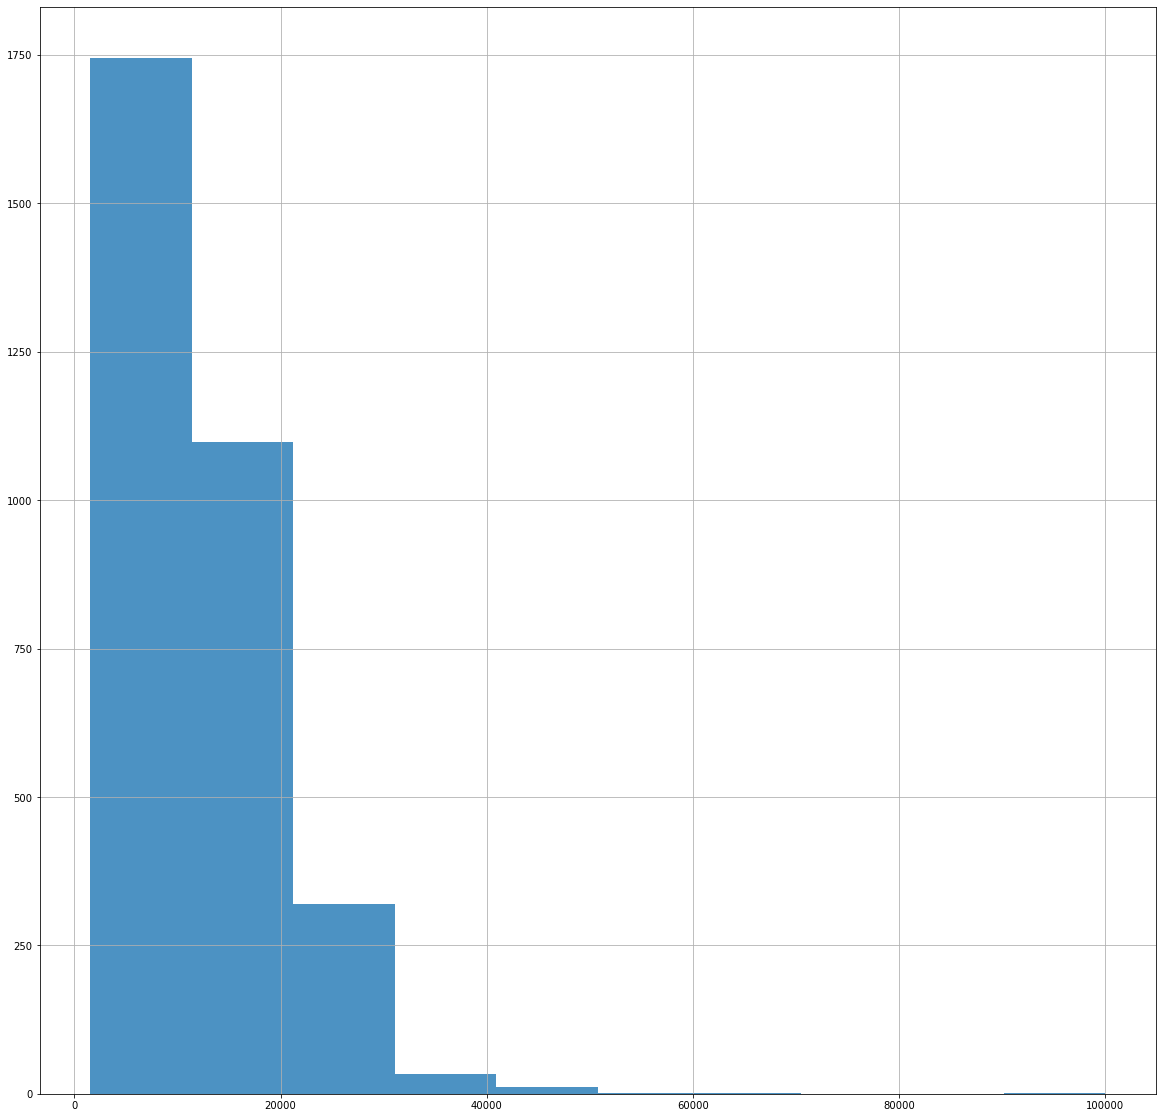

In [18]:
y.hist(alpha=0.8, figsize=(20, 20))
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from matplotlib import cm

y_mm = minmax_scale(y, feature_range=(0, 1))
y_mm

array([0.        , 0.00152368, 0.00152368, ..., 0.6953152 , 0.9995429 ,
       1.        ])

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor

scaler_R = RobustScaler(quantile_range=(25, 75))
scaler_N = QuantileTransformer(output_distribution='normal')
scaler_S = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.32, random_state=42)

#X_train1, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.9, random_state=50)

#X_train_R = pd.DataFrame(scaler_R.fit_transform(X_train))
#X_train_N = pd.DataFrame(scaler_N.fit_transform(X_train))
#X_train_S = pd.DataFrame(scaler_S.fit_transform(X_train))
#X1_train_S = pd.DataFrame(scaler_S.fit_transform(X1_train))

#X_test_R = pd.DataFrame(scaler_R.fit_transform(X_test))
#X_test_N = pd.DataFrame(scaler_N.fit_transform(X_test))
#X_test_S = pd.DataFrame(scaler_S.fit_transform(X_test))
#X1_test_S = pd.DataFrame(scaler_S.fit_transform(X1_test))

scaler_y = MinMaxScaler()
y_train_mm = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
y_test_mm = scaler_y.transform(y_test.values.reshape(-1, 1)).reshape(-1)
#y_train = y_train_mm
#y_test = y_test_mm

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2184, 9)
X_test shape: (1028, 9)
y_train shape: (2184,)
y_test shape: (1028,)


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [34]:
# Define the parameter grid
#y_log = np.log(y)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

y_train_log=np.log(y_train)
y_test_log= np.log(y_test)
y_train_mm = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
y_test_mm = scaler_y.transform(y_test.values.reshape(-1, 1)).reshape(-1)
#X_train_R = pd.DataFrame(scaler_R.fit_transform(X_train1))
#X_train_N = pd.DataFrame(scaler_N.fit_transform(X_train1))
#X_train_S = pd.DataFrame(scaler_S.fit_transform(X_train1))

#X_test_R = pd.DataFrame(scaler_R.fit_transform(X_test1))
#X_test_N = pd.DataFrame(scaler_N.fit_transform(X_test1))
#X_test_S = pd.DataFrame(scaler_S.fit_transform(X_test1))

catboost_regressor = CatBoostRegressor(random_seed=42)

# 
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.1, 0.5, 1],
    'random_strength': [1, 5, 10],
    'border_count': [32, 64, 128],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'min_data_in_leaf': [1, 3, 10],
    'one_hot_max_size': [2, 10, 20]
}

np.int = np.int_

# Initialize the XGBoost model
#xgb_model = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', random_state=50)

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=catboost_regressor, param_distributions=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

categorical_features=['Bike', 'Brand', 'Category', 'Condition']

# Perform Randomized Search
random_search.fit(X_train1, y_train_mm, cat_features=categorical_features)

# Get the best parameters
best_params = random_search.best_params_
best_score = -random_search.best_score_

print(f"Best parameters: {best_params}")

print("Beste Parameter gefunden: ", best_params)
print("Niedrigster MSE gefunden: ", best_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

0:	learn: 0.0681844	total: 58.2ms	remaining: 58.2s
1:	learn: 0.0626122	total: 60.9ms	remaining: 30.4s
2:	learn: 0.0588984	total: 63.7ms	remaining: 21.2s
3:	learn: 0.0556905	total: 65.8ms	remaining: 16.4s
4:	learn: 0.0537046	total: 72ms	remaining: 14.3s
5:	learn: 0.0521846	total: 74.6ms	remaining: 12.4s
6:	learn: 0.0503546	total: 83.1ms	remaining: 11.8s
7:	learn: 0.0490074	total: 85.3ms	remaining: 10.6s
8:	learn: 0.0477300	total: 89.1ms	remaining: 9.81s
9:	learn: 0.0467162	total: 105ms	remaining: 10.4s
10:	learn: 0.0461611	total: 123ms	remaining: 11.1s
11:	learn: 0.0450501	total: 126ms	remaining: 10.4s
12:	learn: 0.0440286	total: 127ms	remaining: 9.66s
13:	learn: 0.0438111	total: 138ms	remaining: 9.73s
14:	learn: 0.0433195	total: 142ms	remaining: 9.32s
15:	learn: 0.0428559	total: 143ms	remaining: 8.8s
16:	learn: 0.0425438	total: 156ms	remaining: 9.05s
17:	learn: 0.0424225	total: 187ms	remaining: 10.2s
18:	learn: 0.0419913	total: 190ms	remaining: 9.81s
19:	learn: 0.0412902	total: 198ms	r

0:	learn: 0.0796546	total: 59.7ms	remaining: 29.8s
1:	learn: 0.0792165	total: 61.1ms	remaining: 15.2s
2:	learn: 0.0787969	total: 67.3ms	remaining: 11.2s
3:	learn: 0.0783808	total: 79.1ms	remaining: 9.81s
4:	learn: 0.0779801	total: 80.5ms	remaining: 7.97s
5:	learn: 0.0775971	total: 91.3ms	remaining: 7.51s
6:	learn: 0.0771948	total: 92.6ms	remaining: 6.52s
7:	learn: 0.0767949	total: 99ms	remaining: 6.09s
8:	learn: 0.0764146	total: 145ms	remaining: 7.9s
9:	learn: 0.0760299	total: 146ms	remaining: 7.17s
10:	learn: 0.0756156	total: 148ms	remaining: 6.57s
11:	learn: 0.0752372	total: 150ms	remaining: 6.1s
12:	learn: 0.0748717	total: 151ms	remaining: 5.67s
13:	learn: 0.0744810	total: 154ms	remaining: 5.33s
14:	learn: 0.0740912	total: 158ms	remaining: 5.12s
15:	learn: 0.0737876	total: 188ms	remaining: 5.7s
16:	learn: 0.0734432	total: 189ms	remaining: 5.38s
17:	learn: 0.0730721	total: 193ms	remaining: 5.17s
18:	learn: 0.0727260	total: 197ms	remaining: 4.99s
19:	learn: 0.0724103	total: 199ms	rema

0:	learn: 0.0755092	total: 50.6ms	remaining: 25.3s
1:	learn: 0.0751572	total: 53ms	remaining: 13.2s
2:	learn: 0.0747846	total: 59.7ms	remaining: 9.89s
3:	learn: 0.0744686	total: 118ms	remaining: 14.6s
4:	learn: 0.0742152	total: 123ms	remaining: 12.2s
5:	learn: 0.0739100	total: 126ms	remaining: 10.3s
6:	learn: 0.0735819	total: 133ms	remaining: 9.35s
7:	learn: 0.0732315	total: 135ms	remaining: 8.3s
8:	learn: 0.0729155	total: 143ms	remaining: 7.8s
9:	learn: 0.0726306	total: 170ms	remaining: 8.35s
10:	learn: 0.0722862	total: 172ms	remaining: 7.64s
11:	learn: 0.0719756	total: 173ms	remaining: 7.05s
12:	learn: 0.0716803	total: 177ms	remaining: 6.61s
13:	learn: 0.0713804	total: 179ms	remaining: 6.21s
14:	learn: 0.0710829	total: 183ms	remaining: 5.92s
15:	learn: 0.0707690	total: 186ms	remaining: 5.63s
16:	learn: 0.0704679	total: 189ms	remaining: 5.36s
17:	learn: 0.0702235	total: 214ms	remaining: 5.74s
18:	learn: 0.0699225	total: 220ms	remaining: 5.56s
19:	learn: 0.0696479	total: 221ms	remainin

0:	learn: 0.0797537	total: 60ms	remaining: 30s
1:	learn: 0.0794477	total: 62.5ms	remaining: 15.6s
2:	learn: 0.0791010	total: 64.1ms	remaining: 10.6s
3:	learn: 0.0787983	total: 78.8ms	remaining: 9.77s
4:	learn: 0.0784993	total: 88.9ms	remaining: 8.8s
5:	learn: 0.0782089	total: 100ms	remaining: 8.25s
6:	learn: 0.0778817	total: 122ms	remaining: 8.56s
7:	learn: 0.0776193	total: 126ms	remaining: 7.76s
8:	learn: 0.0773066	total: 129ms	remaining: 7.02s
9:	learn: 0.0770151	total: 132ms	remaining: 6.46s
10:	learn: 0.0766870	total: 146ms	remaining: 6.48s
11:	learn: 0.0763385	total: 150ms	remaining: 6.09s
12:	learn: 0.0760334	total: 160ms	remaining: 5.98s
13:	learn: 0.0757501	total: 164ms	remaining: 5.69s
14:	learn: 0.0754651	total: 166ms	remaining: 5.38s
15:	learn: 0.0751571	total: 210ms	remaining: 6.36s
16:	learn: 0.0748676	total: 212ms	remaining: 6.01s
17:	learn: 0.0745660	total: 214ms	remaining: 5.73s
18:	learn: 0.0742016	total: 215ms	remaining: 5.45s
19:	learn: 0.0739003	total: 218ms	remaini

160:	learn: 0.0212218	total: 1.49s	remaining: 7.77s
161:	learn: 0.0211640	total: 1.49s	remaining: 7.72s
162:	learn: 0.0211327	total: 1.49s	remaining: 7.67s
163:	learn: 0.0210465	total: 1.5s	remaining: 7.66s
164:	learn: 0.0210042	total: 1.51s	remaining: 7.63s
165:	learn: 0.0209432	total: 1.52s	remaining: 7.66s
166:	learn: 0.0209237	total: 1.53s	remaining: 7.64s
167:	learn: 0.0209217	total: 1.53s	remaining: 7.59s
168:	learn: 0.0208755	total: 1.53s	remaining: 7.54s
169:	learn: 0.0208606	total: 1.54s	remaining: 7.51s
170:	learn: 0.0208381	total: 1.54s	remaining: 7.48s
171:	learn: 0.0204975	total: 1.55s	remaining: 7.45s
172:	learn: 0.0204652	total: 1.55s	remaining: 7.42s
173:	learn: 0.0204611	total: 1.55s	remaining: 7.37s
174:	learn: 0.0204429	total: 1.61s	remaining: 7.57s
175:	learn: 0.0204332	total: 1.62s	remaining: 7.58s
176:	learn: 0.0203959	total: 1.62s	remaining: 7.53s
177:	learn: 0.0203948	total: 1.62s	remaining: 7.49s
178:	learn: 0.0203744	total: 1.63s	remaining: 7.48s
179:	learn: 0

160:	learn: 0.0473026	total: 1.67s	remaining: 3.51s
161:	learn: 0.0472289	total: 1.67s	remaining: 3.49s
162:	learn: 0.0471412	total: 1.69s	remaining: 3.5s
163:	learn: 0.0470700	total: 1.73s	remaining: 3.54s
164:	learn: 0.0469895	total: 1.77s	remaining: 3.6s
165:	learn: 0.0469169	total: 1.77s	remaining: 3.57s
166:	learn: 0.0468254	total: 1.77s	remaining: 3.54s
167:	learn: 0.0467626	total: 1.77s	remaining: 3.51s
168:	learn: 0.0466948	total: 1.78s	remaining: 3.48s
169:	learn: 0.0466237	total: 1.78s	remaining: 3.45s
170:	learn: 0.0465599	total: 1.78s	remaining: 3.43s
171:	learn: 0.0464925	total: 1.78s	remaining: 3.4s
172:	learn: 0.0464261	total: 1.8s	remaining: 3.4s
173:	learn: 0.0463688	total: 1.8s	remaining: 3.37s
174:	learn: 0.0462891	total: 1.8s	remaining: 3.34s
175:	learn: 0.0462363	total: 1.8s	remaining: 3.32s
176:	learn: 0.0461721	total: 1.8s	remaining: 3.29s
177:	learn: 0.0461139	total: 1.81s	remaining: 3.27s
178:	learn: 0.0460488	total: 1.81s	remaining: 3.25s
179:	learn: 0.0459799

159:	learn: 0.0444545	total: 2.04s	remaining: 4.33s
160:	learn: 0.0443903	total: 2.08s	remaining: 4.38s
161:	learn: 0.0443193	total: 2.08s	remaining: 4.35s
162:	learn: 0.0442381	total: 2.1s	remaining: 4.34s
163:	learn: 0.0441541	total: 2.11s	remaining: 4.32s
164:	learn: 0.0440712	total: 2.13s	remaining: 4.33s
165:	learn: 0.0439967	total: 2.16s	remaining: 4.34s
166:	learn: 0.0439272	total: 2.18s	remaining: 4.35s
167:	learn: 0.0438639	total: 2.19s	remaining: 4.32s
168:	learn: 0.0437905	total: 2.21s	remaining: 4.34s
169:	learn: 0.0437253	total: 2.27s	remaining: 4.41s
170:	learn: 0.0436912	total: 2.27s	remaining: 4.37s
171:	learn: 0.0436322	total: 2.27s	remaining: 4.34s
172:	learn: 0.0435634	total: 2.37s	remaining: 4.48s
173:	learn: 0.0435086	total: 2.39s	remaining: 4.47s
174:	learn: 0.0434465	total: 2.39s	remaining: 4.44s
175:	learn: 0.0433884	total: 2.43s	remaining: 4.47s
176:	learn: 0.0433261	total: 2.43s	remaining: 4.44s
177:	learn: 0.0432594	total: 2.44s	remaining: 4.42s
178:	learn: 0

160:	learn: 0.0508282	total: 2.29s	remaining: 4.83s
161:	learn: 0.0507155	total: 2.3s	remaining: 4.79s
162:	learn: 0.0506694	total: 2.37s	remaining: 4.91s
163:	learn: 0.0505817	total: 2.38s	remaining: 4.87s
164:	learn: 0.0505036	total: 2.38s	remaining: 4.83s
165:	learn: 0.0504522	total: 2.38s	remaining: 4.8s
166:	learn: 0.0503945	total: 2.39s	remaining: 4.76s
167:	learn: 0.0503323	total: 2.42s	remaining: 4.78s
168:	learn: 0.0502443	total: 2.46s	remaining: 4.83s
169:	learn: 0.0501739	total: 2.47s	remaining: 4.79s
170:	learn: 0.0501376	total: 2.47s	remaining: 4.75s
171:	learn: 0.0500495	total: 2.47s	remaining: 4.71s
172:	learn: 0.0499699	total: 2.47s	remaining: 4.67s
173:	learn: 0.0498962	total: 2.52s	remaining: 4.71s
174:	learn: 0.0498707	total: 2.52s	remaining: 4.68s
175:	learn: 0.0498207	total: 2.52s	remaining: 4.64s
176:	learn: 0.0497239	total: 2.52s	remaining: 4.6s
177:	learn: 0.0496933	total: 2.53s	remaining: 4.58s
178:	learn: 0.0496438	total: 2.53s	remaining: 4.54s
179:	learn: 0.0

0:	learn: 0.0754490	total: 117ms	remaining: 1m 57s
1:	learn: 0.0750333	total: 174ms	remaining: 1m 27s
2:	learn: 0.0746232	total: 182ms	remaining: 1m
3:	learn: 0.0742257	total: 216ms	remaining: 53.8s
4:	learn: 0.0738314	total: 221ms	remaining: 44s
5:	learn: 0.0734145	total: 226ms	remaining: 37.4s
6:	learn: 0.0730326	total: 251ms	remaining: 35.6s
7:	learn: 0.0726475	total: 287ms	remaining: 35.6s
8:	learn: 0.0722634	total: 300ms	remaining: 33s
9:	learn: 0.0718867	total: 325ms	remaining: 32.2s
10:	learn: 0.0714899	total: 337ms	remaining: 30.3s
11:	learn: 0.0711269	total: 361ms	remaining: 29.7s
12:	learn: 0.0707556	total: 368ms	remaining: 27.9s
13:	learn: 0.0703931	total: 374ms	remaining: 26.4s
14:	learn: 0.0700120	total: 406ms	remaining: 26.7s
15:	learn: 0.0696528	total: 466ms	remaining: 28.7s
16:	learn: 0.0693046	total: 492ms	remaining: 28.4s
17:	learn: 0.0689626	total: 498ms	remaining: 27.1s
18:	learn: 0.0686175	total: 520ms	remaining: 26.9s
19:	learn: 0.0682913	total: 682ms	remaining: 3

318:	learn: 0.0181992	total: 3.14s	remaining: 6.71s
319:	learn: 0.0181946	total: 3.15s	remaining: 6.69s
320:	learn: 0.0181524	total: 3.15s	remaining: 6.67s
321:	learn: 0.0181472	total: 3.17s	remaining: 6.68s
322:	learn: 0.0180450	total: 3.17s	remaining: 6.65s
323:	learn: 0.0180354	total: 3.18s	remaining: 6.63s
324:	learn: 0.0180228	total: 3.18s	remaining: 6.6s
325:	learn: 0.0176885	total: 3.19s	remaining: 6.61s
326:	learn: 0.0176626	total: 3.2s	remaining: 6.59s
327:	learn: 0.0176203	total: 3.25s	remaining: 6.65s
328:	learn: 0.0176111	total: 3.25s	remaining: 6.62s
329:	learn: 0.0175850	total: 3.25s	remaining: 6.6s
330:	learn: 0.0175845	total: 3.25s	remaining: 6.57s
331:	learn: 0.0175800	total: 3.25s	remaining: 6.54s
332:	learn: 0.0175634	total: 3.27s	remaining: 6.54s
333:	learn: 0.0175580	total: 3.27s	remaining: 6.52s
334:	learn: 0.0175304	total: 3.29s	remaining: 6.54s
335:	learn: 0.0175074	total: 3.3s	remaining: 6.51s
336:	learn: 0.0175016	total: 3.35s	remaining: 6.59s
337:	learn: 0.01

318:	learn: 0.0163946	total: 3.81s	remaining: 8.13s
319:	learn: 0.0163756	total: 3.81s	remaining: 8.11s
320:	learn: 0.0163719	total: 3.81s	remaining: 8.07s
321:	learn: 0.0163671	total: 3.85s	remaining: 8.1s
322:	learn: 0.0163583	total: 3.85s	remaining: 8.07s
323:	learn: 0.0163544	total: 3.85s	remaining: 8.04s
324:	learn: 0.0163433	total: 3.86s	remaining: 8.02s
325:	learn: 0.0163362	total: 3.87s	remaining: 8s
326:	learn: 0.0163352	total: 3.87s	remaining: 7.97s
327:	learn: 0.0163285	total: 3.89s	remaining: 7.97s
328:	learn: 0.0163172	total: 3.93s	remaining: 8.01s
329:	learn: 0.0163079	total: 3.93s	remaining: 7.98s
330:	learn: 0.0163058	total: 3.93s	remaining: 7.94s
331:	learn: 0.0163002	total: 3.93s	remaining: 7.91s
332:	learn: 0.0162884	total: 3.94s	remaining: 7.88s
333:	learn: 0.0162798	total: 3.96s	remaining: 7.89s
334:	learn: 0.0162713	total: 3.96s	remaining: 7.86s
335:	learn: 0.0162611	total: 4.02s	remaining: 7.95s
336:	learn: 0.0162508	total: 4.05s	remaining: 7.96s
337:	learn: 0.01

476:	learn: 0.0145817	total: 4.79s	remaining: 5.25s
477:	learn: 0.0145802	total: 4.79s	remaining: 5.23s
478:	learn: 0.0145757	total: 4.79s	remaining: 5.21s
479:	learn: 0.0145672	total: 4.8s	remaining: 5.2s
480:	learn: 0.0145571	total: 4.81s	remaining: 5.19s
481:	learn: 0.0145532	total: 4.81s	remaining: 5.17s
482:	learn: 0.0145529	total: 4.81s	remaining: 5.15s
483:	learn: 0.0145475	total: 4.81s	remaining: 5.13s
484:	learn: 0.0145473	total: 4.82s	remaining: 5.12s
485:	learn: 0.0145458	total: 4.82s	remaining: 5.1s
486:	learn: 0.0145436	total: 4.83s	remaining: 5.08s
487:	learn: 0.0145421	total: 4.83s	remaining: 5.07s
488:	learn: 0.0145365	total: 4.84s	remaining: 5.06s
489:	learn: 0.0145168	total: 4.87s	remaining: 5.07s
490:	learn: 0.0145120	total: 4.87s	remaining: 5.05s
491:	learn: 0.0145061	total: 4.88s	remaining: 5.04s
492:	learn: 0.0145055	total: 4.88s	remaining: 5.02s
493:	learn: 0.0145039	total: 4.89s	remaining: 5.01s
494:	learn: 0.0144988	total: 4.9s	remaining: 5s
495:	learn: 0.01449

317:	learn: 0.0382208	total: 4.21s	remaining: 2.41s
318:	learn: 0.0382086	total: 4.22s	remaining: 2.39s
319:	learn: 0.0381870	total: 4.22s	remaining: 2.37s
320:	learn: 0.0381632	total: 4.22s	remaining: 2.35s
321:	learn: 0.0381372	total: 4.22s	remaining: 2.33s
322:	learn: 0.0381183	total: 4.22s	remaining: 2.31s
323:	learn: 0.0381040	total: 4.22s	remaining: 2.29s
324:	learn: 0.0380901	total: 4.23s	remaining: 2.27s
325:	learn: 0.0380566	total: 4.24s	remaining: 2.26s
326:	learn: 0.0380407	total: 4.24s	remaining: 2.25s
327:	learn: 0.0380135	total: 4.25s	remaining: 2.23s
328:	learn: 0.0379929	total: 4.25s	remaining: 2.21s
329:	learn: 0.0379709	total: 4.25s	remaining: 2.19s
330:	learn: 0.0379468	total: 4.25s	remaining: 2.17s
331:	learn: 0.0379294	total: 4.25s	remaining: 2.15s
332:	learn: 0.0379212	total: 4.25s	remaining: 2.13s
333:	learn: 0.0379023	total: 4.26s	remaining: 2.12s
334:	learn: 0.0378679	total: 4.31s	remaining: 2.12s
335:	learn: 0.0378538	total: 4.31s	remaining: 2.1s
336:	learn: 0

318:	learn: 0.0431694	total: 4.79s	remaining: 2.72s
319:	learn: 0.0431631	total: 4.8s	remaining: 2.7s
320:	learn: 0.0431245	total: 4.8s	remaining: 2.67s
321:	learn: 0.0430989	total: 4.8s	remaining: 2.65s
322:	learn: 0.0430850	total: 4.8s	remaining: 2.63s
323:	learn: 0.0430779	total: 4.81s	remaining: 2.61s
324:	learn: 0.0430545	total: 4.81s	remaining: 2.59s
325:	learn: 0.0430284	total: 4.81s	remaining: 2.57s
326:	learn: 0.0430217	total: 4.83s	remaining: 2.55s
327:	learn: 0.0430083	total: 4.83s	remaining: 2.53s
328:	learn: 0.0429978	total: 4.83s	remaining: 2.51s
329:	learn: 0.0429610	total: 4.83s	remaining: 2.49s
330:	learn: 0.0429467	total: 4.83s	remaining: 2.47s
331:	learn: 0.0429359	total: 4.83s	remaining: 2.45s
332:	learn: 0.0428943	total: 4.84s	remaining: 2.43s
333:	learn: 0.0428641	total: 4.85s	remaining: 2.41s
334:	learn: 0.0428370	total: 4.89s	remaining: 2.41s
335:	learn: 0.0428298	total: 4.89s	remaining: 2.39s
336:	learn: 0.0427956	total: 4.9s	remaining: 2.37s
337:	learn: 0.0427

476:	learn: 0.0141300	total: 5.56s	remaining: 6.09s
477:	learn: 0.0141235	total: 5.56s	remaining: 6.07s
478:	learn: 0.0140772	total: 5.58s	remaining: 6.07s
479:	learn: 0.0140746	total: 5.58s	remaining: 6.05s
480:	learn: 0.0140724	total: 5.58s	remaining: 6.03s
481:	learn: 0.0140677	total: 5.59s	remaining: 6.01s
482:	learn: 0.0140667	total: 5.59s	remaining: 5.99s
483:	learn: 0.0140642	total: 5.59s	remaining: 5.96s
484:	learn: 0.0140314	total: 5.59s	remaining: 5.94s
485:	learn: 0.0140275	total: 5.59s	remaining: 5.92s
486:	learn: 0.0139995	total: 5.6s	remaining: 5.89s
487:	learn: 0.0139935	total: 5.63s	remaining: 5.91s
488:	learn: 0.0139922	total: 5.66s	remaining: 5.92s
489:	learn: 0.0139872	total: 5.69s	remaining: 5.92s
490:	learn: 0.0139841	total: 5.79s	remaining: 6.01s
491:	learn: 0.0139779	total: 5.79s	remaining: 5.98s
492:	learn: 0.0139431	total: 5.8s	remaining: 5.96s
493:	learn: 0.0139377	total: 5.8s	remaining: 5.94s
494:	learn: 0.0139321	total: 5.82s	remaining: 5.93s
495:	learn: 0.0

633:	learn: 0.0119813	total: 6.23s	remaining: 3.6s
634:	learn: 0.0119776	total: 6.23s	remaining: 3.58s
635:	learn: 0.0119675	total: 6.26s	remaining: 3.58s
636:	learn: 0.0119626	total: 6.26s	remaining: 3.57s
637:	learn: 0.0119451	total: 6.26s	remaining: 3.55s
638:	learn: 0.0119355	total: 6.26s	remaining: 3.54s
639:	learn: 0.0119307	total: 6.3s	remaining: 3.54s
640:	learn: 0.0119136	total: 6.3s	remaining: 3.53s
641:	learn: 0.0119125	total: 6.3s	remaining: 3.51s
642:	learn: 0.0119064	total: 6.3s	remaining: 3.5s
643:	learn: 0.0119004	total: 6.3s	remaining: 3.48s
644:	learn: 0.0119000	total: 6.35s	remaining: 3.49s
645:	learn: 0.0118976	total: 6.35s	remaining: 3.48s
646:	learn: 0.0118866	total: 6.35s	remaining: 3.46s
647:	learn: 0.0118852	total: 6.36s	remaining: 3.45s
648:	learn: 0.0118840	total: 6.36s	remaining: 3.44s
649:	learn: 0.0118810	total: 6.37s	remaining: 3.43s
650:	learn: 0.0118807	total: 6.37s	remaining: 3.41s
651:	learn: 0.0118799	total: 6.42s	remaining: 3.43s
652:	learn: 0.01186

475:	learn: 0.0358078	total: 6.32s	remaining: 319ms
476:	learn: 0.0357925	total: 6.33s	remaining: 305ms
477:	learn: 0.0357860	total: 6.33s	remaining: 291ms
478:	learn: 0.0357802	total: 6.33s	remaining: 278ms
479:	learn: 0.0357736	total: 6.36s	remaining: 265ms
480:	learn: 0.0357671	total: 6.37s	remaining: 251ms
481:	learn: 0.0357463	total: 6.39s	remaining: 239ms
482:	learn: 0.0357359	total: 6.39s	remaining: 225ms
483:	learn: 0.0357277	total: 6.39s	remaining: 211ms
484:	learn: 0.0357224	total: 6.42s	remaining: 199ms
485:	learn: 0.0357064	total: 6.42s	remaining: 185ms
486:	learn: 0.0356986	total: 6.45s	remaining: 172ms
487:	learn: 0.0356889	total: 6.51s	remaining: 160ms
488:	learn: 0.0356824	total: 6.52s	remaining: 147ms
489:	learn: 0.0356619	total: 6.52s	remaining: 133ms
490:	learn: 0.0356566	total: 6.52s	remaining: 120ms
491:	learn: 0.0356473	total: 6.52s	remaining: 106ms
492:	learn: 0.0356377	total: 6.53s	remaining: 92.7ms
493:	learn: 0.0356291	total: 6.53s	remaining: 79.3ms
494:	learn

633:	learn: 0.0125486	total: 7.16s	remaining: 4.13s
634:	learn: 0.0125479	total: 7.16s	remaining: 4.12s
635:	learn: 0.0125308	total: 7.16s	remaining: 4.1s
636:	learn: 0.0125294	total: 7.16s	remaining: 4.08s
637:	learn: 0.0125252	total: 7.16s	remaining: 4.06s
638:	learn: 0.0125176	total: 7.16s	remaining: 4.05s
639:	learn: 0.0125152	total: 7.16s	remaining: 4.03s
640:	learn: 0.0125062	total: 7.17s	remaining: 4.01s
641:	learn: 0.0125053	total: 7.17s	remaining: 4s
642:	learn: 0.0124953	total: 7.21s	remaining: 4s
643:	learn: 0.0124924	total: 7.21s	remaining: 3.99s
644:	learn: 0.0124850	total: 7.23s	remaining: 3.98s
645:	learn: 0.0124633	total: 7.27s	remaining: 3.98s
646:	learn: 0.0124626	total: 7.27s	remaining: 3.96s
647:	learn: 0.0124573	total: 7.27s	remaining: 3.95s
648:	learn: 0.0124565	total: 7.28s	remaining: 3.94s
649:	learn: 0.0124557	total: 7.3s	remaining: 3.93s
650:	learn: 0.0124552	total: 7.3s	remaining: 3.92s
651:	learn: 0.0124468	total: 7.3s	remaining: 3.9s
652:	learn: 0.0124334	t

132:	learn: 0.0360045	total: 1.61s	remaining: 10.5s
133:	learn: 0.0359481	total: 1.62s	remaining: 10.5s
134:	learn: 0.0359187	total: 1.64s	remaining: 10.5s
135:	learn: 0.0358808	total: 1.64s	remaining: 10.4s
136:	learn: 0.0358421	total: 1.65s	remaining: 10.4s
137:	learn: 0.0357856	total: 1.65s	remaining: 10.3s
138:	learn: 0.0357551	total: 1.65s	remaining: 10.2s
139:	learn: 0.0357244	total: 1.66s	remaining: 10.2s
140:	learn: 0.0357133	total: 1.66s	remaining: 10.1s
141:	learn: 0.0356773	total: 1.66s	remaining: 10s
142:	learn: 0.0356604	total: 1.66s	remaining: 9.96s
143:	learn: 0.0356104	total: 1.66s	remaining: 9.88s
144:	learn: 0.0355935	total: 1.66s	remaining: 9.81s
145:	learn: 0.0355784	total: 1.67s	remaining: 9.74s
146:	learn: 0.0355427	total: 1.67s	remaining: 9.67s
147:	learn: 0.0355084	total: 1.67s	remaining: 9.64s
148:	learn: 0.0355001	total: 1.7s	remaining: 9.73s
149:	learn: 0.0354766	total: 1.71s	remaining: 9.7s
150:	learn: 0.0354653	total: 1.71s	remaining: 9.63s
151:	learn: 0.03

791:	learn: 0.0110780	total: 8.18s	remaining: 2.15s
792:	learn: 0.0110773	total: 8.23s	remaining: 2.15s
793:	learn: 0.0110763	total: 8.23s	remaining: 2.13s
794:	learn: 0.0110722	total: 8.25s	remaining: 2.13s
795:	learn: 0.0110705	total: 8.25s	remaining: 2.11s
796:	learn: 0.0110634	total: 8.25s	remaining: 2.1s
797:	learn: 0.0110504	total: 8.25s	remaining: 2.09s
798:	learn: 0.0110484	total: 8.25s	remaining: 2.08s
799:	learn: 0.0110468	total: 8.26s	remaining: 2.06s
800:	learn: 0.0110465	total: 8.26s	remaining: 2.05s
801:	learn: 0.0110463	total: 8.26s	remaining: 2.04s
802:	learn: 0.0110436	total: 8.27s	remaining: 2.03s
803:	learn: 0.0110348	total: 8.28s	remaining: 2.02s
804:	learn: 0.0110306	total: 8.28s	remaining: 2s
805:	learn: 0.0110215	total: 8.3s	remaining: 2s
806:	learn: 0.0110208	total: 8.31s	remaining: 1.99s
807:	learn: 0.0110169	total: 8.34s	remaining: 1.98s
808:	learn: 0.0110143	total: 8.37s	remaining: 1.98s
809:	learn: 0.0110121	total: 8.38s	remaining: 1.97s
810:	learn: 0.011002

476:	learn: 0.0406995	total: 6.9s	remaining: 333ms
477:	learn: 0.0406819	total: 6.9s	remaining: 317ms
478:	learn: 0.0406754	total: 6.9s	remaining: 303ms
479:	learn: 0.0406694	total: 6.96s	remaining: 290ms
480:	learn: 0.0406635	total: 6.96s	remaining: 275ms
481:	learn: 0.0406537	total: 6.96s	remaining: 260ms
482:	learn: 0.0406452	total: 6.98s	remaining: 246ms
483:	learn: 0.0406326	total: 6.99s	remaining: 231ms
484:	learn: 0.0406187	total: 7s	remaining: 216ms
485:	learn: 0.0406098	total: 7.04s	remaining: 203ms
486:	learn: 0.0405982	total: 7.04s	remaining: 188ms
487:	learn: 0.0405928	total: 7.04s	remaining: 173ms
488:	learn: 0.0405912	total: 7.04s	remaining: 158ms
489:	learn: 0.0405808	total: 7.04s	remaining: 144ms
490:	learn: 0.0405771	total: 7.05s	remaining: 129ms
491:	learn: 0.0405640	total: 7.05s	remaining: 115ms
492:	learn: 0.0405541	total: 7.05s	remaining: 100ms
493:	learn: 0.0405477	total: 7.06s	remaining: 85.7ms
494:	learn: 0.0405391	total: 7.07s	remaining: 71.4ms
495:	learn: 0.04

131:	learn: 0.0350525	total: 1.75s	remaining: 11.5s
132:	learn: 0.0349943	total: 1.75s	remaining: 11.4s
133:	learn: 0.0349603	total: 1.77s	remaining: 11.4s
134:	learn: 0.0349405	total: 1.77s	remaining: 11.4s
135:	learn: 0.0348819	total: 1.8s	remaining: 11.4s
136:	learn: 0.0346746	total: 1.8s	remaining: 11.4s
137:	learn: 0.0346145	total: 1.8s	remaining: 11.3s
138:	learn: 0.0345998	total: 1.82s	remaining: 11.3s
139:	learn: 0.0345638	total: 1.83s	remaining: 11.2s
140:	learn: 0.0345565	total: 1.83s	remaining: 11.1s
141:	learn: 0.0345418	total: 1.83s	remaining: 11.1s
142:	learn: 0.0344846	total: 1.84s	remaining: 11.1s
143:	learn: 0.0344289	total: 1.84s	remaining: 11s
144:	learn: 0.0344227	total: 1.85s	remaining: 10.9s
145:	learn: 0.0342829	total: 1.85s	remaining: 10.8s
146:	learn: 0.0342638	total: 1.87s	remaining: 10.8s
147:	learn: 0.0342163	total: 1.87s	remaining: 10.8s
148:	learn: 0.0342057	total: 1.87s	remaining: 10.7s
149:	learn: 0.0341447	total: 1.87s	remaining: 10.6s
150:	learn: 0.034

791:	learn: 0.0115481	total: 8.85s	remaining: 2.33s
792:	learn: 0.0115469	total: 8.86s	remaining: 2.31s
793:	learn: 0.0115463	total: 8.86s	remaining: 2.3s
794:	learn: 0.0115415	total: 8.86s	remaining: 2.28s
795:	learn: 0.0115375	total: 8.86s	remaining: 2.27s
796:	learn: 0.0115309	total: 8.86s	remaining: 2.26s
797:	learn: 0.0115304	total: 8.87s	remaining: 2.24s
798:	learn: 0.0115266	total: 8.87s	remaining: 2.23s
799:	learn: 0.0115263	total: 8.87s	remaining: 2.22s
800:	learn: 0.0115219	total: 8.87s	remaining: 2.2s
801:	learn: 0.0115181	total: 8.98s	remaining: 2.22s
802:	learn: 0.0115027	total: 8.98s	remaining: 2.2s
803:	learn: 0.0114979	total: 8.98s	remaining: 2.19s
804:	learn: 0.0114965	total: 8.99s	remaining: 2.18s
805:	learn: 0.0114936	total: 8.99s	remaining: 2.17s
806:	learn: 0.0114927	total: 9s	remaining: 2.15s
807:	learn: 0.0114897	total: 9.01s	remaining: 2.14s
808:	learn: 0.0114891	total: 9.01s	remaining: 2.13s
809:	learn: 0.0114882	total: 9.02s	remaining: 2.12s
810:	learn: 0.0114

289:	learn: 0.0304956	total: 3.38s	remaining: 8.26s
290:	learn: 0.0304784	total: 3.38s	remaining: 8.22s
291:	learn: 0.0304360	total: 3.38s	remaining: 8.19s
292:	learn: 0.0304023	total: 3.38s	remaining: 8.16s
293:	learn: 0.0303620	total: 3.38s	remaining: 8.12s
294:	learn: 0.0302841	total: 3.38s	remaining: 8.09s
295:	learn: 0.0302768	total: 3.38s	remaining: 8.05s
296:	learn: 0.0302412	total: 3.39s	remaining: 8.02s
297:	learn: 0.0302354	total: 3.41s	remaining: 8.04s
298:	learn: 0.0301828	total: 3.43s	remaining: 8.04s
299:	learn: 0.0301758	total: 3.43s	remaining: 8s
300:	learn: 0.0301541	total: 3.43s	remaining: 7.96s
301:	learn: 0.0301194	total: 3.45s	remaining: 7.98s
302:	learn: 0.0301006	total: 3.46s	remaining: 7.95s
303:	learn: 0.0300907	total: 3.47s	remaining: 7.95s
304:	learn: 0.0300883	total: 3.48s	remaining: 7.92s
305:	learn: 0.0300762	total: 3.48s	remaining: 7.88s
306:	learn: 0.0300644	total: 3.48s	remaining: 7.85s
307:	learn: 0.0300429	total: 3.5s	remaining: 7.87s
308:	learn: 0.03

950:	learn: 0.0110774	total: 9.4s	remaining: 484ms
951:	learn: 0.0110759	total: 9.4s	remaining: 474ms
952:	learn: 0.0110712	total: 9.4s	remaining: 464ms
953:	learn: 0.0110695	total: 9.4s	remaining: 453ms
954:	learn: 0.0110693	total: 9.4s	remaining: 443ms
955:	learn: 0.0110662	total: 9.41s	remaining: 433ms
956:	learn: 0.0110637	total: 9.47s	remaining: 426ms
957:	learn: 0.0110626	total: 9.47s	remaining: 415ms
958:	learn: 0.0110585	total: 9.47s	remaining: 405ms
959:	learn: 0.0110585	total: 9.48s	remaining: 395ms
960:	learn: 0.0110575	total: 9.48s	remaining: 385ms
961:	learn: 0.0110574	total: 9.54s	remaining: 377ms
962:	learn: 0.0110567	total: 9.56s	remaining: 367ms
963:	learn: 0.0110480	total: 9.58s	remaining: 358ms
964:	learn: 0.0110473	total: 9.63s	remaining: 349ms
965:	learn: 0.0110472	total: 9.63s	remaining: 339ms
966:	learn: 0.0110415	total: 9.63s	remaining: 329ms
967:	learn: 0.0110262	total: 9.63s	remaining: 319ms
968:	learn: 0.0110221	total: 9.64s	remaining: 308ms
969:	learn: 0.011

132:	learn: 0.0194751	total: 3.31s	remaining: 9.14s
133:	learn: 0.0193331	total: 3.35s	remaining: 9.14s
134:	learn: 0.0192129	total: 3.42s	remaining: 9.26s
135:	learn: 0.0191178	total: 3.46s	remaining: 9.25s
136:	learn: 0.0190250	total: 3.52s	remaining: 9.33s
137:	learn: 0.0189719	total: 3.53s	remaining: 9.25s
138:	learn: 0.0189046	total: 3.55s	remaining: 9.21s
139:	learn: 0.0188464	total: 3.59s	remaining: 9.24s
140:	learn: 0.0187253	total: 3.61s	remaining: 9.18s
141:	learn: 0.0186604	total: 3.67s	remaining: 9.25s
142:	learn: 0.0185615	total: 3.67s	remaining: 9.16s
143:	learn: 0.0184942	total: 3.69s	remaining: 9.13s
144:	learn: 0.0183450	total: 3.69s	remaining: 9.04s
145:	learn: 0.0182147	total: 3.7s	remaining: 8.97s
146:	learn: 0.0181441	total: 3.71s	remaining: 8.92s
147:	learn: 0.0180233	total: 3.74s	remaining: 8.89s
148:	learn: 0.0179984	total: 3.74s	remaining: 8.82s
149:	learn: 0.0179448	total: 3.75s	remaining: 8.74s
150:	learn: 0.0178661	total: 3.77s	remaining: 8.72s
151:	learn: 0

447:	learn: 0.0270603	total: 5.18s	remaining: 6.38s
448:	learn: 0.0270281	total: 5.18s	remaining: 6.36s
449:	learn: 0.0269321	total: 5.18s	remaining: 6.33s
450:	learn: 0.0269240	total: 5.19s	remaining: 6.32s
451:	learn: 0.0269185	total: 5.19s	remaining: 6.29s
452:	learn: 0.0269099	total: 5.24s	remaining: 6.32s
453:	learn: 0.0269071	total: 5.24s	remaining: 6.3s
454:	learn: 0.0268965	total: 5.24s	remaining: 6.28s
455:	learn: 0.0268955	total: 5.24s	remaining: 6.25s
456:	learn: 0.0268950	total: 5.27s	remaining: 6.27s
457:	learn: 0.0268380	total: 5.28s	remaining: 6.24s
458:	learn: 0.0268246	total: 5.32s	remaining: 6.27s
459:	learn: 0.0268191	total: 5.32s	remaining: 6.25s
460:	learn: 0.0268183	total: 5.32s	remaining: 6.22s
461:	learn: 0.0268161	total: 5.32s	remaining: 6.2s
462:	learn: 0.0268155	total: 5.33s	remaining: 6.18s
463:	learn: 0.0268135	total: 5.33s	remaining: 6.15s
464:	learn: 0.0267570	total: 5.33s	remaining: 6.13s
465:	learn: 0.0267385	total: 5.35s	remaining: 6.13s
466:	learn: 0.

949:	learn: 0.0107958	total: 10.3s	remaining: 545ms
950:	learn: 0.0107892	total: 10.3s	remaining: 533ms
951:	learn: 0.0107892	total: 10.4s	remaining: 522ms
952:	learn: 0.0107887	total: 10.4s	remaining: 511ms
953:	learn: 0.0107867	total: 10.4s	remaining: 500ms
954:	learn: 0.0107792	total: 10.4s	remaining: 489ms
955:	learn: 0.0107784	total: 10.4s	remaining: 477ms
956:	learn: 0.0107783	total: 10.4s	remaining: 466ms
957:	learn: 0.0107778	total: 10.4s	remaining: 455ms
958:	learn: 0.0107775	total: 10.4s	remaining: 443ms
959:	learn: 0.0107637	total: 10.4s	remaining: 432ms
960:	learn: 0.0107628	total: 10.4s	remaining: 421ms
961:	learn: 0.0107608	total: 10.4s	remaining: 410ms
962:	learn: 0.0107509	total: 10.4s	remaining: 399ms
963:	learn: 0.0107497	total: 10.4s	remaining: 389ms
964:	learn: 0.0107488	total: 10.4s	remaining: 379ms
965:	learn: 0.0107476	total: 10.4s	remaining: 368ms
966:	learn: 0.0107430	total: 10.5s	remaining: 357ms
967:	learn: 0.0107420	total: 10.5s	remaining: 346ms
968:	learn: 

318:	learn: 0.0363874	total: 12.7s	remaining: 27.1s
319:	learn: 0.0363560	total: 12.8s	remaining: 27.1s
320:	learn: 0.0363163	total: 12.9s	remaining: 27.2s
321:	learn: 0.0362762	total: 12.9s	remaining: 27.1s
322:	learn: 0.0362571	total: 12.9s	remaining: 27.1s
323:	learn: 0.0362247	total: 13s	remaining: 27s
324:	learn: 0.0361912	total: 13s	remaining: 27s
325:	learn: 0.0361645	total: 13s	remaining: 27s
326:	learn: 0.0361342	total: 13.1s	remaining: 27s
327:	learn: 0.0360965	total: 13.2s	remaining: 27.1s
328:	learn: 0.0360655	total: 13.3s	remaining: 27.1s
329:	learn: 0.0360412	total: 13.3s	remaining: 26.9s
330:	learn: 0.0360202	total: 13.3s	remaining: 26.9s
331:	learn: 0.0359806	total: 13.4s	remaining: 26.9s
332:	learn: 0.0359520	total: 13.4s	remaining: 26.8s
333:	learn: 0.0359154	total: 13.4s	remaining: 26.6s
334:	learn: 0.0358904	total: 13.5s	remaining: 26.7s
335:	learn: 0.0358640	total: 13.5s	remaining: 26.6s
336:	learn: 0.0358303	total: 13.5s	remaining: 26.6s
337:	learn: 0.0357924	tota

605:	learn: 0.0247779	total: 6.65s	remaining: 4.33s
606:	learn: 0.0247758	total: 6.7s	remaining: 4.34s
607:	learn: 0.0247737	total: 6.7s	remaining: 4.32s
608:	learn: 0.0247633	total: 6.71s	remaining: 4.3s
609:	learn: 0.0247598	total: 6.71s	remaining: 4.29s
610:	learn: 0.0247524	total: 6.71s	remaining: 4.27s
611:	learn: 0.0247466	total: 6.72s	remaining: 4.26s
612:	learn: 0.0247424	total: 6.85s	remaining: 4.32s
613:	learn: 0.0247273	total: 6.87s	remaining: 4.32s
614:	learn: 0.0247263	total: 6.87s	remaining: 4.3s
615:	learn: 0.0246553	total: 6.88s	remaining: 4.29s
616:	learn: 0.0246517	total: 6.88s	remaining: 4.27s
617:	learn: 0.0246395	total: 6.89s	remaining: 4.26s
618:	learn: 0.0246394	total: 6.89s	remaining: 4.24s
619:	learn: 0.0246386	total: 6.89s	remaining: 4.22s
620:	learn: 0.0246167	total: 6.9s	remaining: 4.21s
621:	learn: 0.0246149	total: 6.92s	remaining: 4.21s
622:	learn: 0.0246115	total: 6.92s	remaining: 4.19s
623:	learn: 0.0246103	total: 6.93s	remaining: 4.17s
624:	learn: 0.024

605:	learn: 0.0225390	total: 8.13s	remaining: 5.29s
606:	learn: 0.0225209	total: 8.15s	remaining: 5.28s
607:	learn: 0.0225198	total: 8.16s	remaining: 5.26s
608:	learn: 0.0225029	total: 8.17s	remaining: 5.24s
609:	learn: 0.0225015	total: 8.21s	remaining: 5.25s
610:	learn: 0.0224943	total: 8.21s	remaining: 5.23s
611:	learn: 0.0224204	total: 8.22s	remaining: 5.21s
612:	learn: 0.0224089	total: 8.24s	remaining: 5.2s
613:	learn: 0.0223893	total: 8.25s	remaining: 5.19s
614:	learn: 0.0223852	total: 8.25s	remaining: 5.17s
615:	learn: 0.0223841	total: 8.25s	remaining: 5.14s
616:	learn: 0.0223829	total: 8.25s	remaining: 5.12s
617:	learn: 0.0223719	total: 8.26s	remaining: 5.1s
618:	learn: 0.0223663	total: 8.26s	remaining: 5.08s
619:	learn: 0.0222946	total: 8.27s	remaining: 5.07s
620:	learn: 0.0222937	total: 8.29s	remaining: 5.06s
621:	learn: 0.0222934	total: 8.31s	remaining: 5.05s
622:	learn: 0.0222930	total: 8.36s	remaining: 5.06s
623:	learn: 0.0222917	total: 8.38s	remaining: 5.05s
624:	learn: 0.

605:	learn: 0.0251146	total: 8.05s	remaining: 5.23s
606:	learn: 0.0250455	total: 8.05s	remaining: 5.21s
607:	learn: 0.0250411	total: 8.05s	remaining: 5.19s
608:	learn: 0.0250402	total: 8.05s	remaining: 5.17s
609:	learn: 0.0250383	total: 8.05s	remaining: 5.15s
610:	learn: 0.0250348	total: 8.06s	remaining: 5.13s
611:	learn: 0.0250215	total: 8.06s	remaining: 5.11s
612:	learn: 0.0250183	total: 8.07s	remaining: 5.09s
613:	learn: 0.0250162	total: 8.07s	remaining: 5.07s
614:	learn: 0.0250156	total: 8.07s	remaining: 5.05s
615:	learn: 0.0250045	total: 8.07s	remaining: 5.03s
616:	learn: 0.0250030	total: 8.07s	remaining: 5.01s
617:	learn: 0.0249966	total: 8.07s	remaining: 4.99s
618:	learn: 0.0249891	total: 8.08s	remaining: 4.97s
619:	learn: 0.0249876	total: 8.08s	remaining: 4.95s
620:	learn: 0.0249850	total: 8.08s	remaining: 4.93s
621:	learn: 0.0249835	total: 8.08s	remaining: 4.91s
622:	learn: 0.0249819	total: 8.08s	remaining: 4.89s
623:	learn: 0.0249803	total: 8.08s	remaining: 4.87s
624:	learn: 

106:	learn: 0.0190699	total: 3.15s	remaining: 26.3s
107:	learn: 0.0189391	total: 3.15s	remaining: 26s
108:	learn: 0.0188279	total: 3.27s	remaining: 26.7s
109:	learn: 0.0187091	total: 3.31s	remaining: 26.8s
110:	learn: 0.0185833	total: 3.32s	remaining: 26.6s
111:	learn: 0.0185051	total: 3.35s	remaining: 26.6s
112:	learn: 0.0184584	total: 3.4s	remaining: 26.7s
113:	learn: 0.0183795	total: 3.53s	remaining: 27.4s
114:	learn: 0.0182785	total: 3.55s	remaining: 27.3s
115:	learn: 0.0181697	total: 3.56s	remaining: 27.1s
116:	learn: 0.0181313	total: 3.56s	remaining: 26.9s
117:	learn: 0.0180831	total: 3.56s	remaining: 26.6s
118:	learn: 0.0179943	total: 3.57s	remaining: 26.4s
119:	learn: 0.0179440	total: 3.58s	remaining: 26.3s
120:	learn: 0.0178630	total: 3.62s	remaining: 26.3s
121:	learn: 0.0178244	total: 3.65s	remaining: 26.3s
122:	learn: 0.0177280	total: 3.66s	remaining: 26.1s
123:	learn: 0.0176097	total: 3.72s	remaining: 26.3s
124:	learn: 0.0175072	total: 3.79s	remaining: 26.5s
125:	learn: 0.0

104:	learn: 0.0200243	total: 3.07s	remaining: 26.2s
105:	learn: 0.0199736	total: 3.13s	remaining: 26.4s
106:	learn: 0.0198782	total: 3.13s	remaining: 26.1s
107:	learn: 0.0198058	total: 3.19s	remaining: 26.4s
108:	learn: 0.0197454	total: 3.2s	remaining: 26.1s
109:	learn: 0.0196875	total: 3.23s	remaining: 26.2s
110:	learn: 0.0196366	total: 3.23s	remaining: 25.9s
111:	learn: 0.0195535	total: 3.28s	remaining: 26s
112:	learn: 0.0194736	total: 3.3s	remaining: 25.9s
113:	learn: 0.0193660	total: 3.31s	remaining: 25.8s
114:	learn: 0.0193339	total: 3.33s	remaining: 25.6s
115:	learn: 0.0192229	total: 3.33s	remaining: 25.4s
116:	learn: 0.0191462	total: 3.38s	remaining: 25.5s
117:	learn: 0.0190834	total: 3.38s	remaining: 25.3s
118:	learn: 0.0189556	total: 3.4s	remaining: 25.2s
119:	learn: 0.0189113	total: 3.42s	remaining: 25.1s
120:	learn: 0.0188661	total: 3.49s	remaining: 25.4s
121:	learn: 0.0188192	total: 3.5s	remaining: 25.2s
122:	learn: 0.0187495	total: 3.51s	remaining: 25s
123:	learn: 0.018655

104:	learn: 0.0199571	total: 2.68s	remaining: 22.9s
105:	learn: 0.0198263	total: 2.7s	remaining: 22.8s
106:	learn: 0.0197164	total: 2.7s	remaining: 22.6s
107:	learn: 0.0196438	total: 2.72s	remaining: 22.5s
108:	learn: 0.0195758	total: 2.72s	remaining: 22.2s
109:	learn: 0.0194762	total: 2.76s	remaining: 22.3s
110:	learn: 0.0193826	total: 2.76s	remaining: 22.1s
111:	learn: 0.0193180	total: 2.76s	remaining: 21.9s
112:	learn: 0.0192291	total: 2.81s	remaining: 22.1s
113:	learn: 0.0191950	total: 2.81s	remaining: 21.9s
114:	learn: 0.0190274	total: 2.82s	remaining: 21.7s
115:	learn: 0.0189494	total: 2.87s	remaining: 21.9s
116:	learn: 0.0188183	total: 2.87s	remaining: 21.7s
117:	learn: 0.0187774	total: 2.95s	remaining: 22s
118:	learn: 0.0187378	total: 2.99s	remaining: 22.1s
119:	learn: 0.0186830	total: 2.99s	remaining: 22s
120:	learn: 0.0186208	total: 3.08s	remaining: 22.4s
121:	learn: 0.0185323	total: 3.09s	remaining: 22.2s
122:	learn: 0.0184807	total: 3.15s	remaining: 22.5s
123:	learn: 0.0184

477:	learn: 0.0323845	total: 19.4s	remaining: 21.2s
478:	learn: 0.0323672	total: 19.5s	remaining: 21.2s
479:	learn: 0.0323490	total: 19.5s	remaining: 21.1s
480:	learn: 0.0323246	total: 19.5s	remaining: 21.1s
481:	learn: 0.0323066	total: 19.5s	remaining: 21s
482:	learn: 0.0322894	total: 19.5s	remaining: 20.9s
483:	learn: 0.0322620	total: 19.6s	remaining: 20.9s
484:	learn: 0.0322446	total: 19.7s	remaining: 20.9s
485:	learn: 0.0322240	total: 19.7s	remaining: 20.8s
486:	learn: 0.0322041	total: 19.7s	remaining: 20.8s
487:	learn: 0.0321827	total: 19.7s	remaining: 20.7s
488:	learn: 0.0321671	total: 19.8s	remaining: 20.7s
489:	learn: 0.0321574	total: 19.8s	remaining: 20.6s
490:	learn: 0.0321396	total: 19.9s	remaining: 20.6s
491:	learn: 0.0321233	total: 20s	remaining: 20.6s
492:	learn: 0.0321053	total: 20s	remaining: 20.6s
493:	learn: 0.0320913	total: 20s	remaining: 20.5s
494:	learn: 0.0320783	total: 20.1s	remaining: 20.5s
495:	learn: 0.0320622	total: 20.2s	remaining: 20.6s
496:	learn: 0.032044

264:	learn: 0.0129251	total: 7.47s	remaining: 20.7s
265:	learn: 0.0129056	total: 7.49s	remaining: 20.7s
266:	learn: 0.0128973	total: 7.5s	remaining: 20.6s
267:	learn: 0.0128898	total: 7.52s	remaining: 20.5s
268:	learn: 0.0128645	total: 7.53s	remaining: 20.5s
269:	learn: 0.0128477	total: 7.62s	remaining: 20.6s
270:	learn: 0.0128370	total: 7.63s	remaining: 20.5s
271:	learn: 0.0128214	total: 7.63s	remaining: 20.4s
272:	learn: 0.0128008	total: 7.7s	remaining: 20.5s
273:	learn: 0.0127924	total: 7.74s	remaining: 20.5s
274:	learn: 0.0127682	total: 7.75s	remaining: 20.4s
275:	learn: 0.0127615	total: 7.79s	remaining: 20.4s
276:	learn: 0.0127477	total: 7.81s	remaining: 20.4s
277:	learn: 0.0127357	total: 7.83s	remaining: 20.3s
278:	learn: 0.0127150	total: 7.84s	remaining: 20.3s
279:	learn: 0.0126965	total: 7.89s	remaining: 20.3s
280:	learn: 0.0126820	total: 7.92s	remaining: 20.3s
281:	learn: 0.0126655	total: 7.94s	remaining: 20.2s
282:	learn: 0.0126465	total: 7.98s	remaining: 20.2s
283:	learn: 0.

921:	learn: 0.0192900	total: 12.1s	remaining: 1.02s
922:	learn: 0.0192898	total: 12.1s	remaining: 1.01s
923:	learn: 0.0192480	total: 12.1s	remaining: 997ms
924:	learn: 0.0192471	total: 12.1s	remaining: 982ms
925:	learn: 0.0192447	total: 12.1s	remaining: 969ms
926:	learn: 0.0192301	total: 12.1s	remaining: 956ms
927:	learn: 0.0192273	total: 12.1s	remaining: 942ms
928:	learn: 0.0192267	total: 12.1s	remaining: 928ms
929:	learn: 0.0192253	total: 12.2s	remaining: 916ms
930:	learn: 0.0192216	total: 12.2s	remaining: 904ms
931:	learn: 0.0192211	total: 12.3s	remaining: 900ms
932:	learn: 0.0192145	total: 12.4s	remaining: 891ms
933:	learn: 0.0192063	total: 12.4s	remaining: 878ms
934:	learn: 0.0191934	total: 12.4s	remaining: 864ms
935:	learn: 0.0191931	total: 12.4s	remaining: 850ms
936:	learn: 0.0191492	total: 12.4s	remaining: 835ms
937:	learn: 0.0191459	total: 12.4s	remaining: 821ms
938:	learn: 0.0191379	total: 12.5s	remaining: 810ms
939:	learn: 0.0191215	total: 12.6s	remaining: 803ms
940:	learn: 

921:	learn: 0.0222035	total: 11.9s	remaining: 1.01s
922:	learn: 0.0221985	total: 11.9s	remaining: 995ms
923:	learn: 0.0221347	total: 12s	remaining: 985ms
924:	learn: 0.0220936	total: 12s	remaining: 972ms
925:	learn: 0.0220923	total: 12s	remaining: 958ms
926:	learn: 0.0220886	total: 12.1s	remaining: 952ms
927:	learn: 0.0220844	total: 12.1s	remaining: 938ms
928:	learn: 0.0220565	total: 12.1s	remaining: 924ms
929:	learn: 0.0220490	total: 12.1s	remaining: 912ms
930:	learn: 0.0220448	total: 12.1s	remaining: 899ms
931:	learn: 0.0220437	total: 12.1s	remaining: 885ms
932:	learn: 0.0220239	total: 12.2s	remaining: 873ms
933:	learn: 0.0220232	total: 12.2s	remaining: 859ms
934:	learn: 0.0220226	total: 12.2s	remaining: 845ms
935:	learn: 0.0220165	total: 12.2s	remaining: 831ms
936:	learn: 0.0220133	total: 12.2s	remaining: 818ms
937:	learn: 0.0220088	total: 12.2s	remaining: 807ms
938:	learn: 0.0220062	total: 12.2s	remaining: 794ms
939:	learn: 0.0220020	total: 12.2s	remaining: 780ms
940:	learn: 0.0219

262:	learn: 0.0136312	total: 8.09s	remaining: 22.7s
263:	learn: 0.0136148	total: 8.16s	remaining: 22.7s
264:	learn: 0.0135862	total: 8.18s	remaining: 22.7s
265:	learn: 0.0135575	total: 8.18s	remaining: 22.6s
266:	learn: 0.0135465	total: 8.19s	remaining: 22.5s
267:	learn: 0.0135279	total: 8.24s	remaining: 22.5s
268:	learn: 0.0135053	total: 8.24s	remaining: 22.4s
269:	learn: 0.0134838	total: 8.31s	remaining: 22.5s
270:	learn: 0.0134621	total: 8.32s	remaining: 22.4s
271:	learn: 0.0134316	total: 8.33s	remaining: 22.3s
272:	learn: 0.0134192	total: 8.4s	remaining: 22.4s
273:	learn: 0.0134029	total: 8.41s	remaining: 22.3s
274:	learn: 0.0133714	total: 8.45s	remaining: 22.3s
275:	learn: 0.0133563	total: 8.48s	remaining: 22.2s
276:	learn: 0.0133428	total: 8.5s	remaining: 22.2s
277:	learn: 0.0133340	total: 8.53s	remaining: 22.2s
278:	learn: 0.0132951	total: 8.53s	remaining: 22s
279:	learn: 0.0132599	total: 8.6s	remaining: 22.1s
280:	learn: 0.0132195	total: 8.6s	remaining: 22s
281:	learn: 0.013206

422:	learn: 0.0108207	total: 11.7s	remaining: 16s
423:	learn: 0.0108018	total: 11.7s	remaining: 16s
424:	learn: 0.0107894	total: 11.8s	remaining: 15.9s
425:	learn: 0.0107829	total: 11.8s	remaining: 16s
426:	learn: 0.0107726	total: 11.9s	remaining: 15.9s
427:	learn: 0.0107592	total: 12s	remaining: 16s
428:	learn: 0.0107487	total: 12s	remaining: 16s
429:	learn: 0.0107412	total: 12s	remaining: 15.9s
430:	learn: 0.0107242	total: 12s	remaining: 15.9s
431:	learn: 0.0107138	total: 12s	remaining: 15.8s
432:	learn: 0.0107083	total: 12.1s	remaining: 15.9s
433:	learn: 0.0107033	total: 12.2s	remaining: 15.9s
434:	learn: 0.0106966	total: 12.2s	remaining: 15.8s
435:	learn: 0.0106793	total: 12.3s	remaining: 15.9s
436:	learn: 0.0106722	total: 12.3s	remaining: 15.9s
437:	learn: 0.0106572	total: 12.3s	remaining: 15.8s
438:	learn: 0.0106549	total: 12.3s	remaining: 15.8s
439:	learn: 0.0106519	total: 12.4s	remaining: 15.7s
440:	learn: 0.0106465	total: 12.5s	remaining: 15.8s
441:	learn: 0.0106422	total: 12.

76:	learn: 0.0329223	total: 1.74s	remaining: 9.53s
77:	learn: 0.0328838	total: 1.75s	remaining: 9.5s
78:	learn: 0.0327962	total: 1.82s	remaining: 9.72s
79:	learn: 0.0326054	total: 1.86s	remaining: 9.76s
80:	learn: 0.0323118	total: 1.9s	remaining: 9.84s
81:	learn: 0.0322829	total: 1.91s	remaining: 9.75s
82:	learn: 0.0322442	total: 1.92s	remaining: 9.66s
83:	learn: 0.0322152	total: 1.92s	remaining: 9.53s
84:	learn: 0.0320007	total: 1.98s	remaining: 9.66s
85:	learn: 0.0316772	total: 1.98s	remaining: 9.54s
86:	learn: 0.0315626	total: 2.01s	remaining: 9.55s
87:	learn: 0.0313311	total: 2.02s	remaining: 9.44s
88:	learn: 0.0313069	total: 2.02s	remaining: 9.32s
89:	learn: 0.0311163	total: 2.02s	remaining: 9.22s
90:	learn: 0.0309578	total: 2.06s	remaining: 9.27s
91:	learn: 0.0306603	total: 2.12s	remaining: 9.38s
92:	learn: 0.0305938	total: 2.13s	remaining: 9.32s
93:	learn: 0.0304626	total: 2.14s	remaining: 9.24s
94:	learn: 0.0303253	total: 2.16s	remaining: 9.21s
95:	learn: 0.0301967	total: 2.16s

634:	learn: 0.0267329	total: 25.6s	remaining: 14.7s
635:	learn: 0.0267199	total: 25.7s	remaining: 14.7s
636:	learn: 0.0267025	total: 25.7s	remaining: 14.7s
637:	learn: 0.0266897	total: 25.8s	remaining: 14.6s
638:	learn: 0.0266792	total: 25.8s	remaining: 14.6s
639:	learn: 0.0266635	total: 25.9s	remaining: 14.6s
640:	learn: 0.0266501	total: 25.9s	remaining: 14.5s
641:	learn: 0.0266346	total: 25.9s	remaining: 14.5s
642:	learn: 0.0266145	total: 26s	remaining: 14.4s
643:	learn: 0.0266035	total: 26s	remaining: 14.4s
644:	learn: 0.0265880	total: 26s	remaining: 14.3s
645:	learn: 0.0265677	total: 26.1s	remaining: 14.3s
646:	learn: 0.0265537	total: 26.1s	remaining: 14.3s
647:	learn: 0.0265434	total: 26.3s	remaining: 14.3s
648:	learn: 0.0265329	total: 26.4s	remaining: 14.3s
649:	learn: 0.0265158	total: 26.4s	remaining: 14.2s
650:	learn: 0.0265044	total: 26.4s	remaining: 14.2s
651:	learn: 0.0264940	total: 26.5s	remaining: 14.2s
652:	learn: 0.0264849	total: 26.5s	remaining: 14.1s
653:	learn: 0.0264

104:	learn: 0.0523364	total: 4.92s	remaining: 41.9s
105:	learn: 0.0522055	total: 4.95s	remaining: 41.7s
106:	learn: 0.0520378	total: 5.01s	remaining: 41.8s
107:	learn: 0.0518749	total: 5.05s	remaining: 41.7s
108:	learn: 0.0517302	total: 5.1s	remaining: 41.7s
109:	learn: 0.0515854	total: 5.18s	remaining: 41.9s
110:	learn: 0.0514218	total: 5.27s	remaining: 42.2s
111:	learn: 0.0512402	total: 5.28s	remaining: 41.9s
112:	learn: 0.0511546	total: 5.28s	remaining: 41.5s
113:	learn: 0.0510864	total: 5.29s	remaining: 41.1s
114:	learn: 0.0509707	total: 5.33s	remaining: 41s
115:	learn: 0.0508344	total: 5.37s	remaining: 41s
116:	learn: 0.0506764	total: 5.39s	remaining: 40.7s
117:	learn: 0.0505469	total: 5.45s	remaining: 40.7s
118:	learn: 0.0504172	total: 5.52s	remaining: 40.9s
119:	learn: 0.0502498	total: 5.6s	remaining: 41.1s
120:	learn: 0.0501039	total: 5.62s	remaining: 40.8s
121:	learn: 0.0499615	total: 5.74s	remaining: 41.3s
122:	learn: 0.0498840	total: 5.74s	remaining: 40.9s
123:	learn: 0.0497

104:	learn: 0.0506532	total: 4.3s	remaining: 36.7s
105:	learn: 0.0505103	total: 4.4s	remaining: 37.1s
106:	learn: 0.0503810	total: 4.42s	remaining: 36.9s
107:	learn: 0.0502545	total: 4.43s	remaining: 36.6s
108:	learn: 0.0500993	total: 4.45s	remaining: 36.4s
109:	learn: 0.0499604	total: 4.57s	remaining: 36.9s
110:	learn: 0.0498164	total: 4.59s	remaining: 36.7s
111:	learn: 0.0496590	total: 4.63s	remaining: 36.7s
112:	learn: 0.0495246	total: 4.66s	remaining: 36.6s
113:	learn: 0.0493811	total: 4.73s	remaining: 36.7s
114:	learn: 0.0492716	total: 4.73s	remaining: 36.4s
115:	learn: 0.0491134	total: 4.81s	remaining: 36.7s
116:	learn: 0.0489913	total: 4.82s	remaining: 36.4s
117:	learn: 0.0489078	total: 4.86s	remaining: 36.3s
118:	learn: 0.0487400	total: 4.88s	remaining: 36.1s
119:	learn: 0.0486352	total: 4.96s	remaining: 36.4s
120:	learn: 0.0484995	total: 4.97s	remaining: 36.1s
121:	learn: 0.0483977	total: 4.98s	remaining: 35.8s
122:	learn: 0.0482696	total: 4.99s	remaining: 35.6s
123:	learn: 0.

634:	learn: 0.0275118	total: 27.7s	remaining: 15.9s
635:	learn: 0.0275021	total: 27.7s	remaining: 15.9s
636:	learn: 0.0274892	total: 27.7s	remaining: 15.8s
637:	learn: 0.0274790	total: 28s	remaining: 15.9s
638:	learn: 0.0274614	total: 28s	remaining: 15.8s
639:	learn: 0.0274495	total: 28.1s	remaining: 15.8s
640:	learn: 0.0274403	total: 28.3s	remaining: 15.8s
641:	learn: 0.0274259	total: 28.3s	remaining: 15.8s
642:	learn: 0.0274153	total: 28.3s	remaining: 15.7s
643:	learn: 0.0273967	total: 28.3s	remaining: 15.6s
644:	learn: 0.0273855	total: 28.3s	remaining: 15.6s
645:	learn: 0.0273755	total: 28.4s	remaining: 15.6s
646:	learn: 0.0273627	total: 28.5s	remaining: 15.5s
647:	learn: 0.0273462	total: 28.5s	remaining: 15.5s
648:	learn: 0.0273363	total: 28.6s	remaining: 15.5s
649:	learn: 0.0273215	total: 28.6s	remaining: 15.4s
650:	learn: 0.0273066	total: 28.7s	remaining: 15.4s
651:	learn: 0.0272962	total: 28.8s	remaining: 15.4s
652:	learn: 0.0272805	total: 28.8s	remaining: 15.3s
653:	learn: 0.02

104:	learn: 0.0541416	total: 4.59s	remaining: 39.1s
105:	learn: 0.0539754	total: 4.7s	remaining: 39.6s
106:	learn: 0.0537957	total: 4.71s	remaining: 39.3s
107:	learn: 0.0536637	total: 4.84s	remaining: 40s
108:	learn: 0.0535092	total: 4.94s	remaining: 40.4s
109:	learn: 0.0533399	total: 4.95s	remaining: 40s
110:	learn: 0.0532197	total: 5.03s	remaining: 40.3s
111:	learn: 0.0531523	total: 5.03s	remaining: 39.9s
112:	learn: 0.0530635	total: 5.05s	remaining: 39.7s
113:	learn: 0.0529328	total: 5.18s	remaining: 40.2s
114:	learn: 0.0528215	total: 5.19s	remaining: 39.9s
115:	learn: 0.0526747	total: 5.23s	remaining: 39.8s
116:	learn: 0.0525651	total: 5.24s	remaining: 39.5s
117:	learn: 0.0524657	total: 5.24s	remaining: 39.2s
118:	learn: 0.0523234	total: 5.32s	remaining: 39.4s
119:	learn: 0.0521777	total: 5.34s	remaining: 39.2s
120:	learn: 0.0520691	total: 5.39s	remaining: 39.2s
121:	learn: 0.0519597	total: 5.41s	remaining: 38.9s
122:	learn: 0.0518525	total: 5.42s	remaining: 38.7s
123:	learn: 0.051

792:	learn: 0.0248063	total: 31.9s	remaining: 8.31s
793:	learn: 0.0247963	total: 31.9s	remaining: 8.29s
794:	learn: 0.0247899	total: 32s	remaining: 8.25s
795:	learn: 0.0247793	total: 32s	remaining: 8.2s
796:	learn: 0.0247759	total: 32s	remaining: 8.15s
797:	learn: 0.0247668	total: 32s	remaining: 8.11s
798:	learn: 0.0247505	total: 32s	remaining: 8.06s
799:	learn: 0.0247384	total: 32.1s	remaining: 8.01s
800:	learn: 0.0247180	total: 32.1s	remaining: 7.98s
801:	learn: 0.0247016	total: 32.1s	remaining: 7.93s
802:	learn: 0.0246961	total: 32.2s	remaining: 7.89s
803:	learn: 0.0246853	total: 32.2s	remaining: 7.85s
804:	learn: 0.0246760	total: 32.2s	remaining: 7.8s
805:	learn: 0.0246613	total: 32.2s	remaining: 7.76s
806:	learn: 0.0246461	total: 32.3s	remaining: 7.71s
807:	learn: 0.0246407	total: 32.4s	remaining: 7.7s
808:	learn: 0.0246310	total: 32.4s	remaining: 7.65s
809:	learn: 0.0246222	total: 32.5s	remaining: 7.62s
810:	learn: 0.0246123	total: 32.5s	remaining: 7.57s
811:	learn: 0.0245971	tot

393:	learn: 0.0172572	total: 8.14s	remaining: 2.19s
394:	learn: 0.0172534	total: 8.15s	remaining: 2.17s
395:	learn: 0.0172423	total: 8.23s	remaining: 2.16s
396:	learn: 0.0172233	total: 8.24s	remaining: 2.14s
397:	learn: 0.0172076	total: 8.24s	remaining: 2.11s
398:	learn: 0.0171990	total: 8.27s	remaining: 2.09s
399:	learn: 0.0171983	total: 8.27s	remaining: 2.07s
400:	learn: 0.0171975	total: 8.3s	remaining: 2.05s
401:	learn: 0.0171844	total: 8.32s	remaining: 2.03s
402:	learn: 0.0171454	total: 8.32s	remaining: 2s
403:	learn: 0.0171441	total: 8.33s	remaining: 1.98s
404:	learn: 0.0171343	total: 8.37s	remaining: 1.96s
405:	learn: 0.0170478	total: 8.37s	remaining: 1.94s
406:	learn: 0.0170459	total: 8.38s	remaining: 1.91s
407:	learn: 0.0170434	total: 8.44s	remaining: 1.9s
408:	learn: 0.0170383	total: 8.45s	remaining: 1.88s
409:	learn: 0.0169525	total: 8.47s	remaining: 1.86s
410:	learn: 0.0169252	total: 8.47s	remaining: 1.83s
411:	learn: 0.0169134	total: 8.51s	remaining: 1.82s
412:	learn: 0.016

578:	learn: 0.0099216	total: 17.5s	remaining: 12.8s
579:	learn: 0.0099108	total: 17.6s	remaining: 12.7s
580:	learn: 0.0099025	total: 17.6s	remaining: 12.7s
581:	learn: 0.0098926	total: 17.6s	remaining: 12.7s
582:	learn: 0.0098877	total: 17.6s	remaining: 12.6s
583:	learn: 0.0098812	total: 17.6s	remaining: 12.6s
584:	learn: 0.0098797	total: 17.6s	remaining: 12.5s
585:	learn: 0.0098677	total: 17.7s	remaining: 12.5s
586:	learn: 0.0098638	total: 17.8s	remaining: 12.5s
587:	learn: 0.0098510	total: 17.8s	remaining: 12.5s
588:	learn: 0.0098460	total: 17.8s	remaining: 12.4s
589:	learn: 0.0098385	total: 17.8s	remaining: 12.4s
590:	learn: 0.0098320	total: 17.8s	remaining: 12.3s
591:	learn: 0.0098281	total: 17.9s	remaining: 12.3s
592:	learn: 0.0098209	total: 17.9s	remaining: 12.3s
593:	learn: 0.0098158	total: 17.9s	remaining: 12.2s
594:	learn: 0.0098128	total: 17.9s	remaining: 12.2s
595:	learn: 0.0098102	total: 17.9s	remaining: 12.1s
596:	learn: 0.0098069	total: 17.9s	remaining: 12.1s
597:	learn: 

738:	learn: 0.0086177	total: 20s	remaining: 7.07s
739:	learn: 0.0086122	total: 20s	remaining: 7.04s
740:	learn: 0.0086060	total: 20.1s	remaining: 7.01s
741:	learn: 0.0086015	total: 20.1s	remaining: 6.97s
742:	learn: 0.0085945	total: 20.1s	remaining: 6.95s
743:	learn: 0.0085902	total: 20.1s	remaining: 6.92s
744:	learn: 0.0085850	total: 20.2s	remaining: 6.91s
745:	learn: 0.0085839	total: 20.2s	remaining: 6.88s
746:	learn: 0.0085818	total: 20.2s	remaining: 6.85s
747:	learn: 0.0085757	total: 20.3s	remaining: 6.83s
748:	learn: 0.0085723	total: 20.3s	remaining: 6.8s
749:	learn: 0.0085703	total: 20.3s	remaining: 6.78s
750:	learn: 0.0085670	total: 20.4s	remaining: 6.75s
751:	learn: 0.0085629	total: 20.4s	remaining: 6.72s
752:	learn: 0.0085511	total: 20.5s	remaining: 6.71s
753:	learn: 0.0085489	total: 20.5s	remaining: 6.7s
754:	learn: 0.0085428	total: 20.6s	remaining: 6.67s
755:	learn: 0.0085353	total: 20.6s	remaining: 6.64s
756:	learn: 0.0085281	total: 20.6s	remaining: 6.61s
757:	learn: 0.0085

792:	learn: 0.0256795	total: 34.1s	remaining: 8.89s
793:	learn: 0.0256721	total: 34.1s	remaining: 8.84s
794:	learn: 0.0256604	total: 34.1s	remaining: 8.79s
795:	learn: 0.0256499	total: 34.1s	remaining: 8.75s
796:	learn: 0.0256357	total: 34.2s	remaining: 8.7s
797:	learn: 0.0256218	total: 34.2s	remaining: 8.65s
798:	learn: 0.0256146	total: 34.2s	remaining: 8.59s
799:	learn: 0.0256023	total: 34.2s	remaining: 8.54s
800:	learn: 0.0255928	total: 34.3s	remaining: 8.52s
801:	learn: 0.0255818	total: 34.4s	remaining: 8.48s
802:	learn: 0.0255719	total: 34.5s	remaining: 8.46s
803:	learn: 0.0255629	total: 34.5s	remaining: 8.41s
804:	learn: 0.0255503	total: 34.5s	remaining: 8.36s
805:	learn: 0.0255379	total: 34.5s	remaining: 8.31s
806:	learn: 0.0255284	total: 34.6s	remaining: 8.26s
807:	learn: 0.0255201	total: 34.6s	remaining: 8.21s
808:	learn: 0.0255142	total: 34.6s	remaining: 8.18s
809:	learn: 0.0255024	total: 34.8s	remaining: 8.16s
810:	learn: 0.0254955	total: 34.8s	remaining: 8.11s
811:	learn: 0

736:	learn: 0.0091497	total: 20.2s	remaining: 7.22s
737:	learn: 0.0091443	total: 20.3s	remaining: 7.22s
738:	learn: 0.0091362	total: 20.4s	remaining: 7.19s
739:	learn: 0.0091333	total: 20.4s	remaining: 7.16s
740:	learn: 0.0091266	total: 20.4s	remaining: 7.12s
741:	learn: 0.0091216	total: 20.4s	remaining: 7.09s
742:	learn: 0.0091197	total: 20.5s	remaining: 7.1s
743:	learn: 0.0091177	total: 20.5s	remaining: 7.06s
744:	learn: 0.0091162	total: 20.5s	remaining: 7.03s
745:	learn: 0.0091106	total: 20.5s	remaining: 6.99s
746:	learn: 0.0091062	total: 20.5s	remaining: 6.96s
747:	learn: 0.0091039	total: 20.5s	remaining: 6.92s
748:	learn: 0.0091008	total: 20.6s	remaining: 6.89s
749:	learn: 0.0090976	total: 20.6s	remaining: 6.86s
750:	learn: 0.0090950	total: 20.6s	remaining: 6.82s
751:	learn: 0.0090895	total: 20.6s	remaining: 6.79s
752:	learn: 0.0090880	total: 20.6s	remaining: 6.75s
753:	learn: 0.0090789	total: 20.6s	remaining: 6.72s
754:	learn: 0.0090697	total: 20.6s	remaining: 6.68s
755:	learn: 0

47:	learn: 0.0275692	total: 896ms	remaining: 8.43s
48:	learn: 0.0273530	total: 898ms	remaining: 8.26s
49:	learn: 0.0271524	total: 899ms	remaining: 8.09s
50:	learn: 0.0268639	total: 905ms	remaining: 7.97s
51:	learn: 0.0265583	total: 907ms	remaining: 7.82s
52:	learn: 0.0265276	total: 915ms	remaining: 7.72s
53:	learn: 0.0264260	total: 917ms	remaining: 7.57s
54:	learn: 0.0263195	total: 943ms	remaining: 7.63s
55:	learn: 0.0262512	total: 945ms	remaining: 7.5s
56:	learn: 0.0261360	total: 965ms	remaining: 7.5s
57:	learn: 0.0261015	total: 967ms	remaining: 7.37s
58:	learn: 0.0260625	total: 969ms	remaining: 7.24s
59:	learn: 0.0257752	total: 971ms	remaining: 7.12s
60:	learn: 0.0256241	total: 981ms	remaining: 7.06s
61:	learn: 0.0255951	total: 983ms	remaining: 6.94s
62:	learn: 0.0253549	total: 988ms	remaining: 6.85s
63:	learn: 0.0252728	total: 1.07s	remaining: 7.33s
64:	learn: 0.0252567	total: 1.08s	remaining: 7.21s
65:	learn: 0.0251769	total: 1.08s	remaining: 7.09s
66:	learn: 0.0251272	total: 1.1s	

46:	learn: 0.0319155	total: 1.01s	remaining: 9.79s
47:	learn: 0.0317369	total: 1.02s	remaining: 9.64s
48:	learn: 0.0316867	total: 1.05s	remaining: 9.66s
49:	learn: 0.0316423	total: 1.05s	remaining: 9.5s
50:	learn: 0.0315464	total: 1.12s	remaining: 9.88s
51:	learn: 0.0315192	total: 1.12s	remaining: 9.68s
52:	learn: 0.0314405	total: 1.14s	remaining: 9.62s
53:	learn: 0.0314034	total: 1.14s	remaining: 9.44s
54:	learn: 0.0313825	total: 1.14s	remaining: 9.26s
55:	learn: 0.0313276	total: 1.15s	remaining: 9.11s
56:	learn: 0.0312887	total: 1.18s	remaining: 9.17s
57:	learn: 0.0310777	total: 1.19s	remaining: 9.03s
58:	learn: 0.0309730	total: 1.19s	remaining: 8.88s
59:	learn: 0.0308928	total: 1.22s	remaining: 8.93s
60:	learn: 0.0308571	total: 1.22s	remaining: 8.78s
61:	learn: 0.0307765	total: 1.22s	remaining: 8.63s
62:	learn: 0.0306301	total: 1.24s	remaining: 8.62s
63:	learn: 0.0305793	total: 1.25s	remaining: 8.5s
64:	learn: 0.0305364	total: 1.34s	remaining: 8.99s
65:	learn: 0.0305169	total: 1.35s

420:	learn: 0.0349294	total: 17.4s	remaining: 23.9s
421:	learn: 0.0349138	total: 17.5s	remaining: 23.9s
422:	learn: 0.0349061	total: 17.5s	remaining: 23.9s
423:	learn: 0.0348697	total: 17.6s	remaining: 23.8s
424:	learn: 0.0348435	total: 17.6s	remaining: 23.8s
425:	learn: 0.0348228	total: 17.6s	remaining: 23.7s
426:	learn: 0.0348069	total: 17.6s	remaining: 23.6s
427:	learn: 0.0347850	total: 17.7s	remaining: 23.6s
428:	learn: 0.0347751	total: 17.8s	remaining: 23.6s
429:	learn: 0.0347565	total: 17.9s	remaining: 23.7s
430:	learn: 0.0347086	total: 17.9s	remaining: 23.6s
431:	learn: 0.0346962	total: 18s	remaining: 23.7s
432:	learn: 0.0346962	total: 18s	remaining: 23.6s
433:	learn: 0.0346777	total: 18s	remaining: 23.5s
434:	learn: 0.0346710	total: 18s	remaining: 23.4s
435:	learn: 0.0346634	total: 18.1s	remaining: 23.4s
436:	learn: 0.0346236	total: 18.2s	remaining: 23.4s
437:	learn: 0.0346106	total: 18.2s	remaining: 23.4s
438:	learn: 0.0345996	total: 18.3s	remaining: 23.4s
439:	learn: 0.034583

206:	learn: 0.0142769	total: 4.84s	remaining: 6.86s
207:	learn: 0.0142372	total: 4.87s	remaining: 6.84s
208:	learn: 0.0142081	total: 4.87s	remaining: 6.79s
209:	learn: 0.0141752	total: 4.92s	remaining: 6.8s
210:	learn: 0.0141725	total: 4.93s	remaining: 6.76s
211:	learn: 0.0141546	total: 4.94s	remaining: 6.71s
212:	learn: 0.0141267	total: 4.95s	remaining: 6.67s
213:	learn: 0.0141015	total: 4.97s	remaining: 6.64s
214:	learn: 0.0140742	total: 4.98s	remaining: 6.61s
215:	learn: 0.0140632	total: 4.99s	remaining: 6.56s
216:	learn: 0.0140471	total: 5.05s	remaining: 6.59s
217:	learn: 0.0140112	total: 5.12s	remaining: 6.63s
218:	learn: 0.0139838	total: 5.17s	remaining: 6.64s
219:	learn: 0.0139474	total: 5.18s	remaining: 6.59s
220:	learn: 0.0139311	total: 5.2s	remaining: 6.56s
221:	learn: 0.0139102	total: 5.22s	remaining: 6.53s
222:	learn: 0.0138977	total: 5.22s	remaining: 6.49s
223:	learn: 0.0138471	total: 5.23s	remaining: 6.44s
224:	learn: 0.0137977	total: 5.25s	remaining: 6.41s
225:	learn: 0.

578:	learn: 0.0325937	total: 21.4s	remaining: 15.6s
579:	learn: 0.0325887	total: 21.4s	remaining: 15.5s
580:	learn: 0.0325497	total: 21.5s	remaining: 15.5s
581:	learn: 0.0325363	total: 21.5s	remaining: 15.4s
582:	learn: 0.0325083	total: 21.5s	remaining: 15.4s
583:	learn: 0.0325052	total: 21.5s	remaining: 15.3s
584:	learn: 0.0324821	total: 21.5s	remaining: 15.2s
585:	learn: 0.0324722	total: 21.5s	remaining: 15.2s
586:	learn: 0.0324568	total: 21.5s	remaining: 15.1s
587:	learn: 0.0324470	total: 21.6s	remaining: 15.1s
588:	learn: 0.0324291	total: 21.6s	remaining: 15.1s
589:	learn: 0.0324106	total: 21.7s	remaining: 15.1s
590:	learn: 0.0323952	total: 21.7s	remaining: 15s
591:	learn: 0.0323845	total: 21.7s	remaining: 14.9s
592:	learn: 0.0323748	total: 21.7s	remaining: 14.9s
593:	learn: 0.0323587	total: 21.7s	remaining: 14.9s
594:	learn: 0.0323498	total: 21.8s	remaining: 14.8s
595:	learn: 0.0323295	total: 21.8s	remaining: 14.8s
596:	learn: 0.0323295	total: 21.8s	remaining: 14.7s
597:	learn: 0.

736:	learn: 0.0304273	total: 24.4s	remaining: 8.7s
737:	learn: 0.0304174	total: 24.4s	remaining: 8.66s
738:	learn: 0.0304126	total: 24.4s	remaining: 8.62s
739:	learn: 0.0303962	total: 24.4s	remaining: 8.57s
740:	learn: 0.0303840	total: 24.4s	remaining: 8.53s
741:	learn: 0.0303643	total: 24.4s	remaining: 8.49s
742:	learn: 0.0303494	total: 24.4s	remaining: 8.45s
743:	learn: 0.0303487	total: 24.4s	remaining: 8.4s
744:	learn: 0.0303398	total: 24.4s	remaining: 8.36s
745:	learn: 0.0303397	total: 24.4s	remaining: 8.32s
746:	learn: 0.0303333	total: 24.4s	remaining: 8.28s
747:	learn: 0.0303026	total: 24.4s	remaining: 8.24s
748:	learn: 0.0302605	total: 24.5s	remaining: 8.2s
749:	learn: 0.0302472	total: 24.5s	remaining: 8.15s
750:	learn: 0.0302355	total: 24.5s	remaining: 8.11s
751:	learn: 0.0302233	total: 24.5s	remaining: 8.07s
752:	learn: 0.0301924	total: 24.5s	remaining: 8.03s
753:	learn: 0.0301906	total: 24.5s	remaining: 7.99s
754:	learn: 0.0301622	total: 24.5s	remaining: 7.95s
755:	learn: 0.0

736:	learn: 0.0327161	total: 23.8s	remaining: 8.49s
737:	learn: 0.0326620	total: 23.8s	remaining: 8.44s
738:	learn: 0.0326550	total: 23.8s	remaining: 8.4s
739:	learn: 0.0326229	total: 23.8s	remaining: 8.36s
740:	learn: 0.0325753	total: 23.8s	remaining: 8.32s
741:	learn: 0.0325493	total: 23.8s	remaining: 8.28s
742:	learn: 0.0325446	total: 23.8s	remaining: 8.23s
743:	learn: 0.0325367	total: 23.8s	remaining: 8.19s
744:	learn: 0.0324890	total: 23.8s	remaining: 8.15s
745:	learn: 0.0324722	total: 23.8s	remaining: 8.11s
746:	learn: 0.0324532	total: 23.8s	remaining: 8.07s
747:	learn: 0.0324295	total: 23.8s	remaining: 8.03s
748:	learn: 0.0324246	total: 23.8s	remaining: 7.99s
749:	learn: 0.0324147	total: 23.9s	remaining: 7.95s
750:	learn: 0.0323826	total: 23.9s	remaining: 7.91s
751:	learn: 0.0323734	total: 23.9s	remaining: 7.87s
752:	learn: 0.0323650	total: 23.9s	remaining: 7.83s
753:	learn: 0.0323474	total: 23.9s	remaining: 7.79s
754:	learn: 0.0323252	total: 23.9s	remaining: 7.76s
755:	learn: 0

27:	learn: 0.0673040	total: 187ms	remaining: 6.5s
28:	learn: 0.0669909	total: 193ms	remaining: 6.45s
29:	learn: 0.0666655	total: 199ms	remaining: 6.43s
30:	learn: 0.0663316	total: 204ms	remaining: 6.39s
31:	learn: 0.0660176	total: 210ms	remaining: 6.37s
32:	learn: 0.0656973	total: 219ms	remaining: 6.41s
33:	learn: 0.0653989	total: 224ms	remaining: 6.38s
34:	learn: 0.0650923	total: 233ms	remaining: 6.42s
35:	learn: 0.0647924	total: 238ms	remaining: 6.38s
36:	learn: 0.0644856	total: 249ms	remaining: 6.47s
37:	learn: 0.0641888	total: 255ms	remaining: 6.47s
38:	learn: 0.0638952	total: 263ms	remaining: 6.49s
39:	learn: 0.0636241	total: 269ms	remaining: 6.44s
40:	learn: 0.0633257	total: 278ms	remaining: 6.5s
41:	learn: 0.0630310	total: 284ms	remaining: 6.47s
42:	learn: 0.0627292	total: 291ms	remaining: 6.47s
43:	learn: 0.0624373	total: 297ms	remaining: 6.44s
44:	learn: 0.0621563	total: 301ms	remaining: 6.4s
45:	learn: 0.0618656	total: 308ms	remaining: 6.38s
46:	learn: 0.0615859	total: 313ms	

210:	learn: 0.0393348	total: 1.46s	remaining: 5.47s
211:	learn: 0.0392866	total: 1.47s	remaining: 5.46s
212:	learn: 0.0392261	total: 1.47s	remaining: 5.45s
213:	learn: 0.0391616	total: 1.48s	remaining: 5.44s
214:	learn: 0.0391180	total: 1.49s	remaining: 5.43s
215:	learn: 0.0390689	total: 1.49s	remaining: 5.41s
216:	learn: 0.0390194	total: 1.5s	remaining: 5.41s
217:	learn: 0.0389668	total: 1.5s	remaining: 5.39s
218:	learn: 0.0389076	total: 1.51s	remaining: 5.38s
219:	learn: 0.0388544	total: 1.51s	remaining: 5.37s
220:	learn: 0.0388112	total: 1.52s	remaining: 5.35s
221:	learn: 0.0387567	total: 1.52s	remaining: 5.35s
222:	learn: 0.0387040	total: 1.53s	remaining: 5.33s
223:	learn: 0.0386575	total: 1.54s	remaining: 5.32s
224:	learn: 0.0385942	total: 1.54s	remaining: 5.32s
225:	learn: 0.0385377	total: 1.55s	remaining: 5.3s
226:	learn: 0.0384838	total: 1.55s	remaining: 5.29s
227:	learn: 0.0384435	total: 1.56s	remaining: 5.28s
228:	learn: 0.0383871	total: 1.56s	remaining: 5.27s
229:	learn: 0.0

370:	learn: 0.0334876	total: 2.35s	remaining: 3.99s
371:	learn: 0.0334542	total: 2.36s	remaining: 3.98s
372:	learn: 0.0334305	total: 2.37s	remaining: 3.98s
373:	learn: 0.0334124	total: 2.37s	remaining: 3.97s
374:	learn: 0.0333885	total: 2.38s	remaining: 3.97s
375:	learn: 0.0333546	total: 2.39s	remaining: 3.96s
376:	learn: 0.0333200	total: 2.39s	remaining: 3.96s
377:	learn: 0.0332950	total: 2.4s	remaining: 3.95s
378:	learn: 0.0332811	total: 2.4s	remaining: 3.94s
379:	learn: 0.0332563	total: 2.41s	remaining: 3.93s
380:	learn: 0.0332427	total: 2.42s	remaining: 3.92s
381:	learn: 0.0332153	total: 2.42s	remaining: 3.92s
382:	learn: 0.0331827	total: 2.43s	remaining: 3.91s
383:	learn: 0.0331525	total: 2.43s	remaining: 3.9s
384:	learn: 0.0331222	total: 2.44s	remaining: 3.9s
385:	learn: 0.0330977	total: 2.45s	remaining: 3.89s
386:	learn: 0.0330684	total: 2.45s	remaining: 3.89s
387:	learn: 0.0330539	total: 2.46s	remaining: 3.88s
388:	learn: 0.0330299	total: 2.46s	remaining: 3.87s
389:	learn: 0.03

551:	learn: 0.0303124	total: 3.23s	remaining: 2.62s
552:	learn: 0.0303022	total: 3.23s	remaining: 2.61s
553:	learn: 0.0302909	total: 3.24s	remaining: 2.6s
554:	learn: 0.0302765	total: 3.24s	remaining: 2.6s
555:	learn: 0.0302548	total: 3.25s	remaining: 2.59s
556:	learn: 0.0302375	total: 3.25s	remaining: 2.59s
557:	learn: 0.0302246	total: 3.25s	remaining: 2.58s
558:	learn: 0.0302122	total: 3.26s	remaining: 2.57s
559:	learn: 0.0301977	total: 3.26s	remaining: 2.56s
560:	learn: 0.0301804	total: 3.27s	remaining: 2.56s
561:	learn: 0.0301657	total: 3.27s	remaining: 2.55s
562:	learn: 0.0301562	total: 3.27s	remaining: 2.54s
563:	learn: 0.0301510	total: 3.28s	remaining: 2.53s
564:	learn: 0.0301309	total: 3.28s	remaining: 2.53s
565:	learn: 0.0301156	total: 3.29s	remaining: 2.52s
566:	learn: 0.0301030	total: 3.29s	remaining: 2.51s
567:	learn: 0.0300894	total: 3.29s	remaining: 2.51s
568:	learn: 0.0300769	total: 3.3s	remaining: 2.5s
569:	learn: 0.0300629	total: 3.31s	remaining: 2.49s
570:	learn: 0.03

746:	learn: 0.0278896	total: 4.09s	remaining: 1.39s
747:	learn: 0.0278723	total: 4.1s	remaining: 1.38s
748:	learn: 0.0278656	total: 4.1s	remaining: 1.37s
749:	learn: 0.0278569	total: 4.1s	remaining: 1.37s
750:	learn: 0.0278481	total: 4.11s	remaining: 1.36s
751:	learn: 0.0278354	total: 4.11s	remaining: 1.35s
752:	learn: 0.0278233	total: 4.12s	remaining: 1.35s
753:	learn: 0.0278041	total: 4.12s	remaining: 1.34s
754:	learn: 0.0277865	total: 4.12s	remaining: 1.34s
755:	learn: 0.0277792	total: 4.13s	remaining: 1.33s
756:	learn: 0.0277635	total: 4.13s	remaining: 1.33s
757:	learn: 0.0277570	total: 4.14s	remaining: 1.32s
758:	learn: 0.0277435	total: 4.14s	remaining: 1.31s
759:	learn: 0.0277338	total: 4.15s	remaining: 1.31s
760:	learn: 0.0277145	total: 4.15s	remaining: 1.3s
761:	learn: 0.0277025	total: 4.16s	remaining: 1.3s
762:	learn: 0.0276851	total: 4.16s	remaining: 1.29s
763:	learn: 0.0276722	total: 4.16s	remaining: 1.29s
764:	learn: 0.0276654	total: 4.17s	remaining: 1.28s
765:	learn: 0.027

915:	learn: 0.0259370	total: 4.77s	remaining: 437ms
916:	learn: 0.0259276	total: 4.77s	remaining: 432ms
917:	learn: 0.0259242	total: 4.78s	remaining: 427ms
918:	learn: 0.0259168	total: 4.78s	remaining: 421ms
919:	learn: 0.0259075	total: 4.79s	remaining: 416ms
920:	learn: 0.0258917	total: 4.79s	remaining: 411ms
921:	learn: 0.0258784	total: 4.79s	remaining: 405ms
922:	learn: 0.0258670	total: 4.79s	remaining: 400ms
923:	learn: 0.0258579	total: 4.8s	remaining: 395ms
924:	learn: 0.0258417	total: 4.8s	remaining: 389ms
925:	learn: 0.0258375	total: 4.81s	remaining: 384ms
926:	learn: 0.0258346	total: 4.81s	remaining: 379ms
927:	learn: 0.0258266	total: 4.81s	remaining: 373ms
928:	learn: 0.0258125	total: 4.82s	remaining: 368ms
929:	learn: 0.0257919	total: 4.82s	remaining: 363ms
930:	learn: 0.0257866	total: 4.82s	remaining: 358ms
931:	learn: 0.0257789	total: 4.83s	remaining: 352ms
932:	learn: 0.0257639	total: 4.83s	remaining: 347ms
933:	learn: 0.0257564	total: 4.83s	remaining: 342ms
934:	learn: 0.

In [35]:
best_cat = CatBoostRegressor(**best_params, random_seed=42, verbose=100)
best_cat.fit(X_train1, y_train_mm, cat_features=categorical_features)
y_pred = best_cat.predict(X_test1)

y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_true = scaler_y.inverse_transform(y_test_mm.reshape(-1, 1)).reshape(-1)

mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"R-squared: {r2}")

0:	learn: 0.0775925	total: 7.09ms	remaining: 7.08s
100:	learn: 0.0501409	total: 645ms	remaining: 5.74s
200:	learn: 0.0399462	total: 1.28s	remaining: 5.11s
300:	learn: 0.0353594	total: 1.83s	remaining: 4.25s
400:	learn: 0.0327855	total: 2.35s	remaining: 3.51s
500:	learn: 0.0310268	total: 2.83s	remaining: 2.82s
600:	learn: 0.0296272	total: 3.33s	remaining: 2.21s
700:	learn: 0.0284135	total: 3.81s	remaining: 1.63s
800:	learn: 0.0271920	total: 4.25s	remaining: 1.05s
900:	learn: 0.0260808	total: 4.65s	remaining: 511ms
999:	learn: 0.0251719	total: 5.13s	remaining: 0us
Root Mean Squared Error (RMSE): 2463.6610236765937
R-squared: 0.8774091607366578
951:	learn: 0.0256750	total: 36.1s	remaining: 1.82s
952:	learn: 0.0256617	total: 36.1s	remaining: 1.78s
953:	learn: 0.0256471	total: 36.2s	remaining: 1.75s
954:	learn: 0.0256352	total: 36.3s	remaining: 1.71s
955:	learn: 0.0256265	total: 36.3s	remaining: 1.67s
956:	learn: 0.0256139	total: 36.3s	remaining: 1.63s
957:	learn: 0.0256037	total: 36.4s	rem

950:	learn: 0.0241150	total: 38.8s	remaining: 2s
951:	learn: 0.0241033	total: 38.8s	remaining: 1.96s
952:	learn: 0.0240946	total: 38.9s	remaining: 1.92s
953:	learn: 0.0240865	total: 38.9s	remaining: 1.87s
954:	learn: 0.0240773	total: 38.9s	remaining: 1.83s
955:	learn: 0.0240726	total: 38.9s	remaining: 1.79s
956:	learn: 0.0240648	total: 38.9s	remaining: 1.75s
957:	learn: 0.0240558	total: 38.9s	remaining: 1.71s
958:	learn: 0.0240518	total: 39s	remaining: 1.67s
959:	learn: 0.0240415	total: 39s	remaining: 1.62s
960:	learn: 0.0240310	total: 39s	remaining: 1.58s
961:	learn: 0.0240222	total: 39s	remaining: 1.54s
962:	learn: 0.0240088	total: 39s	remaining: 1.5s
963:	learn: 0.0239901	total: 39.1s	remaining: 1.46s
964:	learn: 0.0239781	total: 39.1s	remaining: 1.42s
965:	learn: 0.0239739	total: 39.1s	remaining: 1.38s
966:	learn: 0.0239727	total: 39.2s	remaining: 1.34s
967:	learn: 0.0239667	total: 39.2s	remaining: 1.3s
968:	learn: 0.0239614	total: 39.2s	remaining: 1.25s
969:	learn: 0.0239545	total

894:	learn: 0.0085084	total: 25.2s	remaining: 2.96s
895:	learn: 0.0085054	total: 25.2s	remaining: 2.93s
896:	learn: 0.0085005	total: 25.3s	remaining: 2.9s
897:	learn: 0.0084984	total: 25.3s	remaining: 2.88s
898:	learn: 0.0084965	total: 25.3s	remaining: 2.84s
899:	learn: 0.0084921	total: 25.3s	remaining: 2.81s
900:	learn: 0.0084891	total: 25.3s	remaining: 2.78s
901:	learn: 0.0084854	total: 25.3s	remaining: 2.75s
902:	learn: 0.0084834	total: 25.3s	remaining: 2.72s
903:	learn: 0.0084812	total: 25.4s	remaining: 2.7s
904:	learn: 0.0084767	total: 25.4s	remaining: 2.67s
905:	learn: 0.0084740	total: 25.4s	remaining: 2.64s
906:	learn: 0.0084673	total: 25.5s	remaining: 2.61s
907:	learn: 0.0084626	total: 25.5s	remaining: 2.58s
908:	learn: 0.0084587	total: 25.5s	remaining: 2.55s
909:	learn: 0.0084569	total: 25.5s	remaining: 2.52s
910:	learn: 0.0084558	total: 25.5s	remaining: 2.49s
911:	learn: 0.0084532	total: 25.5s	remaining: 2.46s
912:	learn: 0.0084521	total: 25.6s	remaining: 2.44s
913:	learn: 0.

364:	learn: 0.0112879	total: 7.11s	remaining: 2.63s
365:	learn: 0.0112591	total: 7.11s	remaining: 2.6s
366:	learn: 0.0112319	total: 7.13s	remaining: 2.58s
367:	learn: 0.0112145	total: 7.17s	remaining: 2.57s
368:	learn: 0.0112110	total: 7.17s	remaining: 2.55s
369:	learn: 0.0111978	total: 7.18s	remaining: 2.52s
370:	learn: 0.0111892	total: 7.22s	remaining: 2.51s
371:	learn: 0.0111878	total: 7.22s	remaining: 2.48s
372:	learn: 0.0111712	total: 7.22s	remaining: 2.46s
373:	learn: 0.0111479	total: 7.22s	remaining: 2.43s
374:	learn: 0.0111400	total: 7.23s	remaining: 2.41s
375:	learn: 0.0111293	total: 7.25s	remaining: 2.39s
376:	learn: 0.0111239	total: 7.25s	remaining: 2.37s
377:	learn: 0.0111177	total: 7.27s	remaining: 2.35s
378:	learn: 0.0110901	total: 7.28s	remaining: 2.32s
379:	learn: 0.0110566	total: 7.28s	remaining: 2.3s
380:	learn: 0.0110533	total: 7.28s	remaining: 2.27s
381:	learn: 0.0110335	total: 7.31s	remaining: 2.26s
382:	learn: 0.0110273	total: 7.31s	remaining: 2.23s
383:	learn: 0.

894:	learn: 0.0296226	total: 24.8s	remaining: 2.91s
895:	learn: 0.0296121	total: 24.8s	remaining: 2.88s
896:	learn: 0.0296082	total: 24.8s	remaining: 2.85s
897:	learn: 0.0296065	total: 24.8s	remaining: 2.82s
898:	learn: 0.0296010	total: 24.8s	remaining: 2.79s
899:	learn: 0.0295757	total: 24.8s	remaining: 2.76s
900:	learn: 0.0295669	total: 24.8s	remaining: 2.73s
901:	learn: 0.0295643	total: 24.9s	remaining: 2.7s
902:	learn: 0.0295552	total: 24.9s	remaining: 2.67s
903:	learn: 0.0295512	total: 24.9s	remaining: 2.64s
904:	learn: 0.0295454	total: 24.9s	remaining: 2.61s
905:	learn: 0.0295320	total: 24.9s	remaining: 2.58s
906:	learn: 0.0295017	total: 24.9s	remaining: 2.55s
907:	learn: 0.0294932	total: 24.9s	remaining: 2.52s
908:	learn: 0.0294568	total: 24.9s	remaining: 2.49s
909:	learn: 0.0294544	total: 24.9s	remaining: 2.46s
910:	learn: 0.0294352	total: 24.9s	remaining: 2.43s
911:	learn: 0.0294082	total: 24.9s	remaining: 2.4s
912:	learn: 0.0293763	total: 24.9s	remaining: 2.37s
913:	learn: 0.

Cat mm: 

Best parameters: {'random_strength': 1, 'one_hot_max_size': 20, 'min_data_in_leaf': 10, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 1000, 'grow_policy': 'Depthwise', 'depth': 10, 'border_count': 64, 'bagging_temperature': 0.1}

Root Mean Squared Error (RMSE): 2463.6610236765937

R-squared: 0.8774091607366578